# MESA model

### Import needed packages

In [1]:
# MESA modules

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import SingleGrid
from mesa.datacollection import DataCollector
from mesa.batchrunner import BatchRunner

# Other packages

import time
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

# Different styles to chose from

plt.style.use(['science','retro'])
# plt.style.use("ggplot")
# plt.style.use("Solarize_Light2")
# plt.style.use("dark_background")
# plt.style.use('science')
# plt.style.use(['science','ieee'])


## Model Execution

### Run Setup

In [2]:
seed1 = 1
d_steps = 60
d_version = '26906a'
# d_agents = 20
dynamic_firms = False
act_policies = 'base_scenario'
shock = {'shock_drop':-0.0, # it is relative pay attention and should be negative
         'shock_duration':60,
         'shock_start':48 }

# Define number of groups and their characteristics

# Imitators # Characteristics
imit_scen = {"e_f_r": [8,12],"b_f_r": [8,12],"g_f_r": [9.5,10.5]}   

firm_scen0 =  [{"e_f_r": [9,11],"b_f_r": [9,11],"g_f_r": [9,11],   # Group A # Characteristics
                "p_i_e": 1/3 , "p_i_g": 1/3 , "p_i_b": 1/3 ,       # Investment probabilities
                "num": 20 }]                                       # Number

firm_scen1 =  [{"e_f_r": [11,13],"b_f_r": [11,13],"g_f_r": [7,9],  # Group A # Characteristics
                "p_i_e": 0.45 , "p_i_g": 0.45 , "p_i_b": 0.1 ,     # Investment probabilities
                "num": 10 },                                       # Number
                {"e_f_r": [9,11],"b_f_r": [9,11],"g_f_r": [13-15], # Group B # Characteristics
                "p_i_e": 0.05 , "p_i_g": 0.05 , "p_i_b": 0.9 ,     # Investment probabilities
                "num": 10 }]                                       # Number

firm_scen2 =  [{"e_f_r": [13,15],"b_f_r": [13,15],"g_f_r": [9,11], # Group A # Characteristics
                "p_i_e": 0.45, "p_i_g": 0.45, "p_i_b": 0.1 ,       # Investment probabilities
                "num": 10 },                                       # Number
                {"e_f_r": [9,11],"b_f_r": [9,11],"g_f_r": [13,15], # Group B # Characteristics
                "p_i_e": 0.05 , "p_i_g": 0.05 , "p_i_b": 0.9 ,     # Investment probabilities
                "num": 10 }]                                       # Number

policies = {"base_scenario":{'λ_e' : 1/3, 'λ_b' : 1/3,'λ_g' : 1/3,
                         'σ_g' : 0, 'P_r_l_g' : 1 },
            "scenario0":{'λ_e' : 1/3, 'λ_b' : 1/3,'λ_g' : 1/3,
                         'σ_g' : 0, 'P_r_l_g' : 1 },
            "scenario1a":{'λ_e' : 0, 'λ_b' : 1,'λ_g' : 0,
                         'σ_g' : 0, 'P_r_l_g' : 1 },
            "scenario1b":{'λ_e' : 0.1, 'λ_b' : 0.1, 'λ_g' : 0.8,
                         'σ_g' : 0, 'P_r_l_g' : 1 },
            "scenario1c":{'λ_e' : 0, 'λ_b' : 0.5, 'λ_g' : 0.5,
                         'σ_g' : 0, 'P_r_l_g' : 1 },
            "scenario2a":{'λ_e' : 1/3, 'λ_b' : 1/3, 'λ_g' : 1/3,
                         'σ_g' : 0.4, 'P_r_l_g' : 1 },
            "scenario2ba":{'λ_e' : 1/3, 'λ_b' : 1/3, 'λ_g' : 1/3,
                         'σ_g' : 0, 'P_r_l_g' : 1 },
            "scenario1a":{'λ_e' : 1/3, 'λ_b' : 1/3, 'λ_g' : 1/3,
                         'σ_g' : 0, 'P_r_l_g' : 0.4 },
            "scenario1a":{'λ_e' : 1/3, 'λ_b' : 1/3, 'λ_g' : 1/3,
                         'σ_g' : 0.2, 'P_r_l_g' : 0.4 }}

### Run Simulations

In [3]:
from Model import Agent, EconomyModel 

np.random.seed(seed1)
start = time.time()
# model = EconomyModel(seed1, d_agents, d_steps, dynamic_firms, scenario[act_scenario],shock)
model = EconomyModel( d_steps, dynamic_firms, policies[act_policies],shock, firm_scen0, imit_scen)
for i in range(model.num_steps):
    # print('step {}'.format(i))
    model.step()

model_df = model.dc.get_model_vars_dataframe()
agent_df = model.dc.get_agent_vars_dataframe()
agent_df = agent_df.reset_index()
end = time.time()
print(end - start)


KeyError: 'λ_g_b'

#### Save the resulting files

In [4]:
# model_df.to_csv("Data/model_{}_{}_{}.csv".format(d_agents,d_steps,d_version))
# agent_df2 = agent_df.reset_index()
# agent_df2.to_csv("Data/agent_{}_{}_{}.csv".format(d_agents,d_steps,d_version)) 

#### Import past results

In [5]:
# model_df = pd.read_csv("Data/model_{}_{}_{}.csv".format(d_agents,d_steps,d_version))
# agent_df = pd.read_csv("Data/agent_{}_{}_{}.csv".format(d_agents,d_steps,d_version)) 

#### Set display options

In [6]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)

### Inspect agent_df

In [7]:
# model_df.head(35)
x_lin = model_df.index/12+2020

In [8]:
agent_df.head(30)

Step  AgentID  name       e_fs        p_fs       b_fs       g_fs  \
0      1        0     0   9.871990  297.494064   9.051852  10.099325   
1      1        1     1   9.870645  297.507602   9.840736   9.660670   
2      1        2     2   9.409297  302.209425  10.238542   9.599309   
3      1        3     3   9.533655  300.930249  10.242268  10.058284   
4      1        4     4   9.269160  303.661980  10.027156   9.368880   
5      1        5     5  10.570670  290.580037  10.707951   9.988474   
6      1        6     6  10.693123  289.390702   9.159291  10.010492   
7      1        7     7   9.130573  305.110454   9.856245   9.193062   
8      1        8     8   9.254320  303.816505  10.193491   9.452024   
9      1        9     9   9.213891  304.238176   9.440612   9.699653   
10     1       10    10   9.935575  296.855107   9.403486  10.280813   
11     1       11    11   9.966140  296.548703  10.010473   9.773785   
12     1       12    12  10.587275  290.418399  10.160008   9.324597   
13     1       13    13  10.401505  292.233488  10.929102  10.000017   
14     1       14    14  10.779040  288.559855   9.683227  10.134288   
15     1       15    15   9.855092  297.664219   9.873495  10.553118   
16     1       16    16  10.071208  295.498987  10.907484  10.088416   
17     1       17    17   9.164190  304.757978   9.732685  10.701701   
18     1       18    18   9.812550  298.093262   9.054405   9.494354   
19     1       19    19   9.134289  305.071458  10.987704  10.941161   
20     2        0     0   9.871990  297.494064   9.051852  10.099325   
21     2        1     1   9.870645  297.507602   9.840736   9.660670   
22     2        2     2   9.409297  302.209425  10.238542   9.599309   
23     2        3     3   9.533655  300.930249  10.242268  10.058284   
24     2        4     4   9.269160  303.661980  10.027156   9.368880   
25     2        5     5  10.570670  290.580037  10.707951   9.988474   
26     2        6     6  10.693123  289.390702   9.159291  10.010492   
27     2        7     7   9.130573  305.110454   9.856245   9.193062   
28     2        8     8   9.254320  303.816505  10.193491   9.452024   
29     2        9     9   9.213891  304.238176   9.440612   9.699653   

         I_fs     ms_fs          r_fs        c_fs        f_c_fs          π_fs  \
0    9.663731  0.031317  3.131721e+07  247.911720  4.071237e+06  1.148298e+06   
1    9.790242  0.038064  3.806379e+07  247.923002  4.948293e+06  1.395672e+06   
2    9.742680  0.035382  3.538237e+07  251.841188  4.599708e+06  1.297354e+06   
3    9.940155  0.047809  4.780878e+07  250.775207  6.215141e+06  1.752988e+06   
4    9.549236  0.026190  2.619024e+07  253.051650  3.404732e+06  9.603090e+05   
5   10.417640  0.096639  9.663858e+07  242.150031  1.256302e+07  3.543415e+06   
6    9.934377  0.047394  4.739360e+07  241.158919  6.161168e+06  1.737765e+06   
7    9.387643  0.020275  2.027491e+07  254.258712  2.635738e+06  7.434133e+05   
8    9.624926  0.029483  2.948300e+07  253.180421  3.832790e+06  1.081043e+06   
9    9.449304  0.022367  2.236699e+07  253.531813  2.907709e+06  8.201231e+05   
10   9.866652  0.042772  4.277179e+07  247.379256  5.560332e+06  1.568299e+06   
11   9.916265  0.046114  4.611395e+07  247.123919  5.994814e+06  1.690845e+06   
12  10.010047  0.053107  5.310704e+07  242.015332  6.903916e+06  1.947258e+06   
13  10.436634  0.099316  9.931558e+07  243.527906  1.291102e+07  3.641571e+06   
14  10.188990  0.069275  6.927520e+07  240.466546  9.005776e+06  2.540091e+06   
15  10.088752  0.059727  5.972723e+07  248.053516  7.764540e+06  2.189998e+06   
16  10.348476  0.087449  8.744930e+07  246.249156  1.136841e+07  3.206474e+06   
17   9.846000  0.041448  4.144844e+07  253.964982  5.388297e+06  1.519776e+06   
18   9.448635  0.022343  2.234326e+07  248.411052  2.904624e+06  8.192530e+05   
19  10.316880  0.083529  8.352873e+07  254.226215  1.085873e+07  3.062720e+06   
20   9.663731  0.031317  3.137739e+07  247.911720  4.071628e+06  1.157

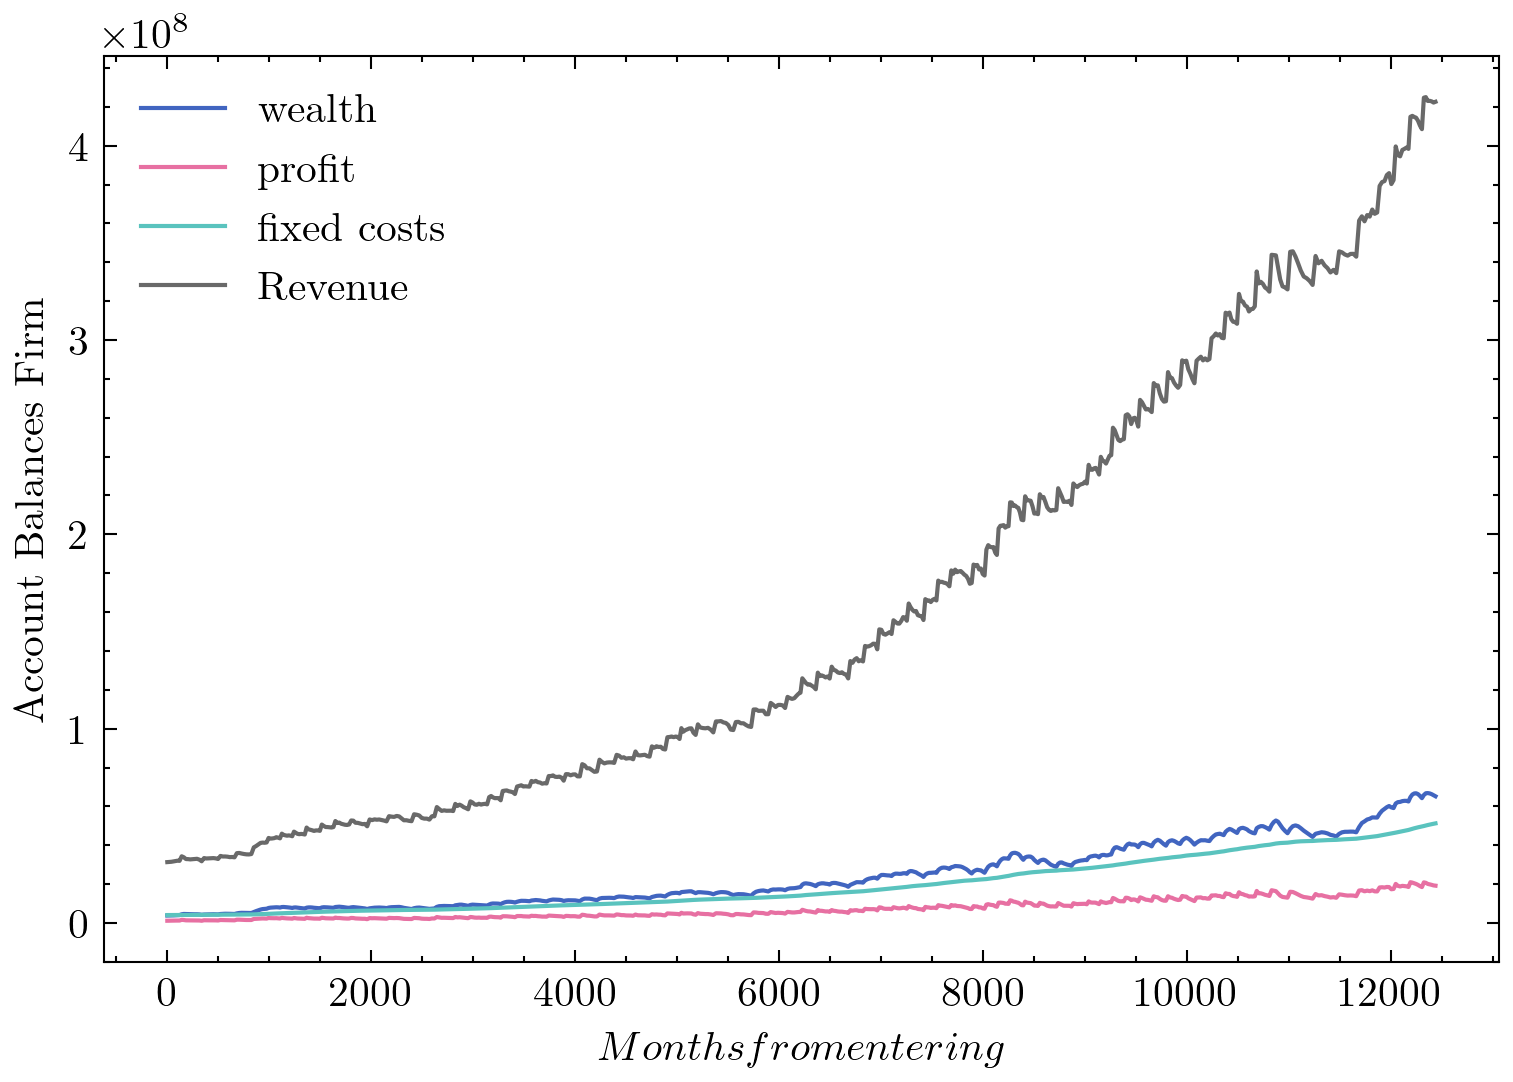

In [9]:
plt.figure(num=None, figsize=(6, 4), dpi=300)
plt.plot(agent_df[agent_df.name == 0].s_fs, label = 'wealth')
plt.plot(agent_df[agent_df.name == 0].π_fs, label = 'profit')
plt.plot(agent_df[agent_df.name == 0].f_c_fs, label = 'fixed costs')
plt.plot(agent_df[agent_df.name == 0].r_fs, label = 'Revenue')
plt.xlabel('$Months from entering$')
plt.legend()
plt.ylabel('Account Balances Firm')
# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/VerSinNoGDPs.pdf')
plt.show()

### Inspect model_df

#### Plot the GDPs

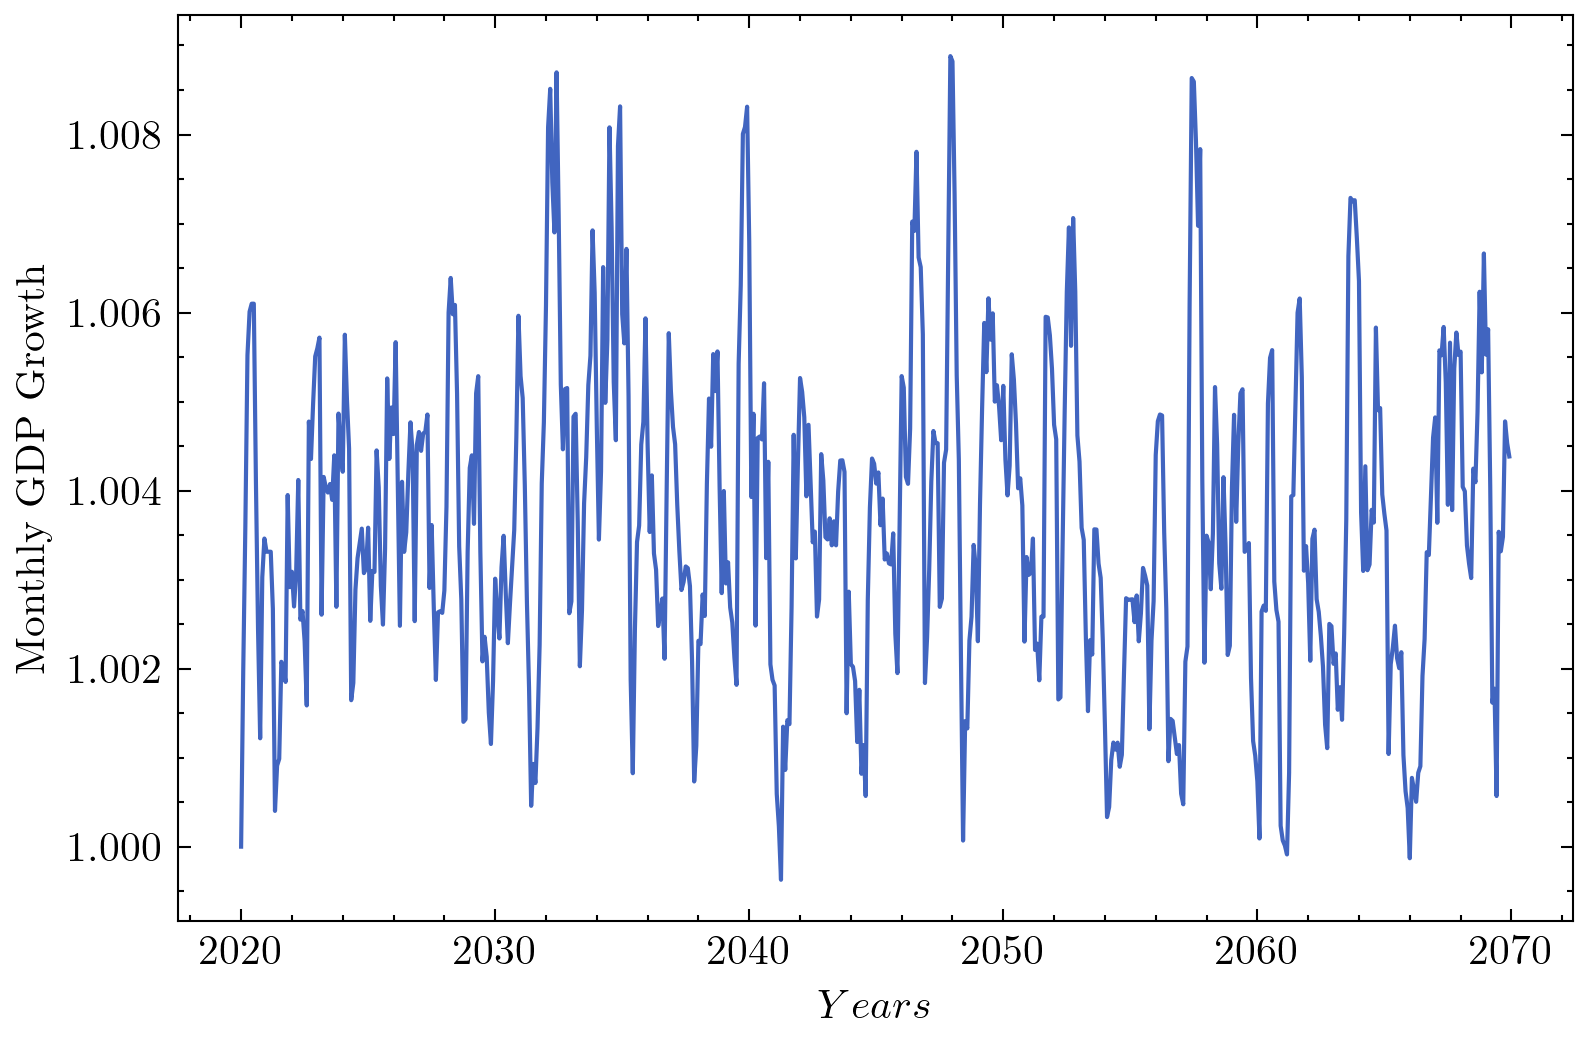

In [10]:
plt.figure(num=None, figsize=(6, 4), dpi=300)
plt.plot(x_lin,model_df.GDPGrowth)
plt.xlabel('$Years$')
plt.ylabel('Monthly GDP Growth')
# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/VerMulVarNoGDPgrowth.pdf')
plt.show()

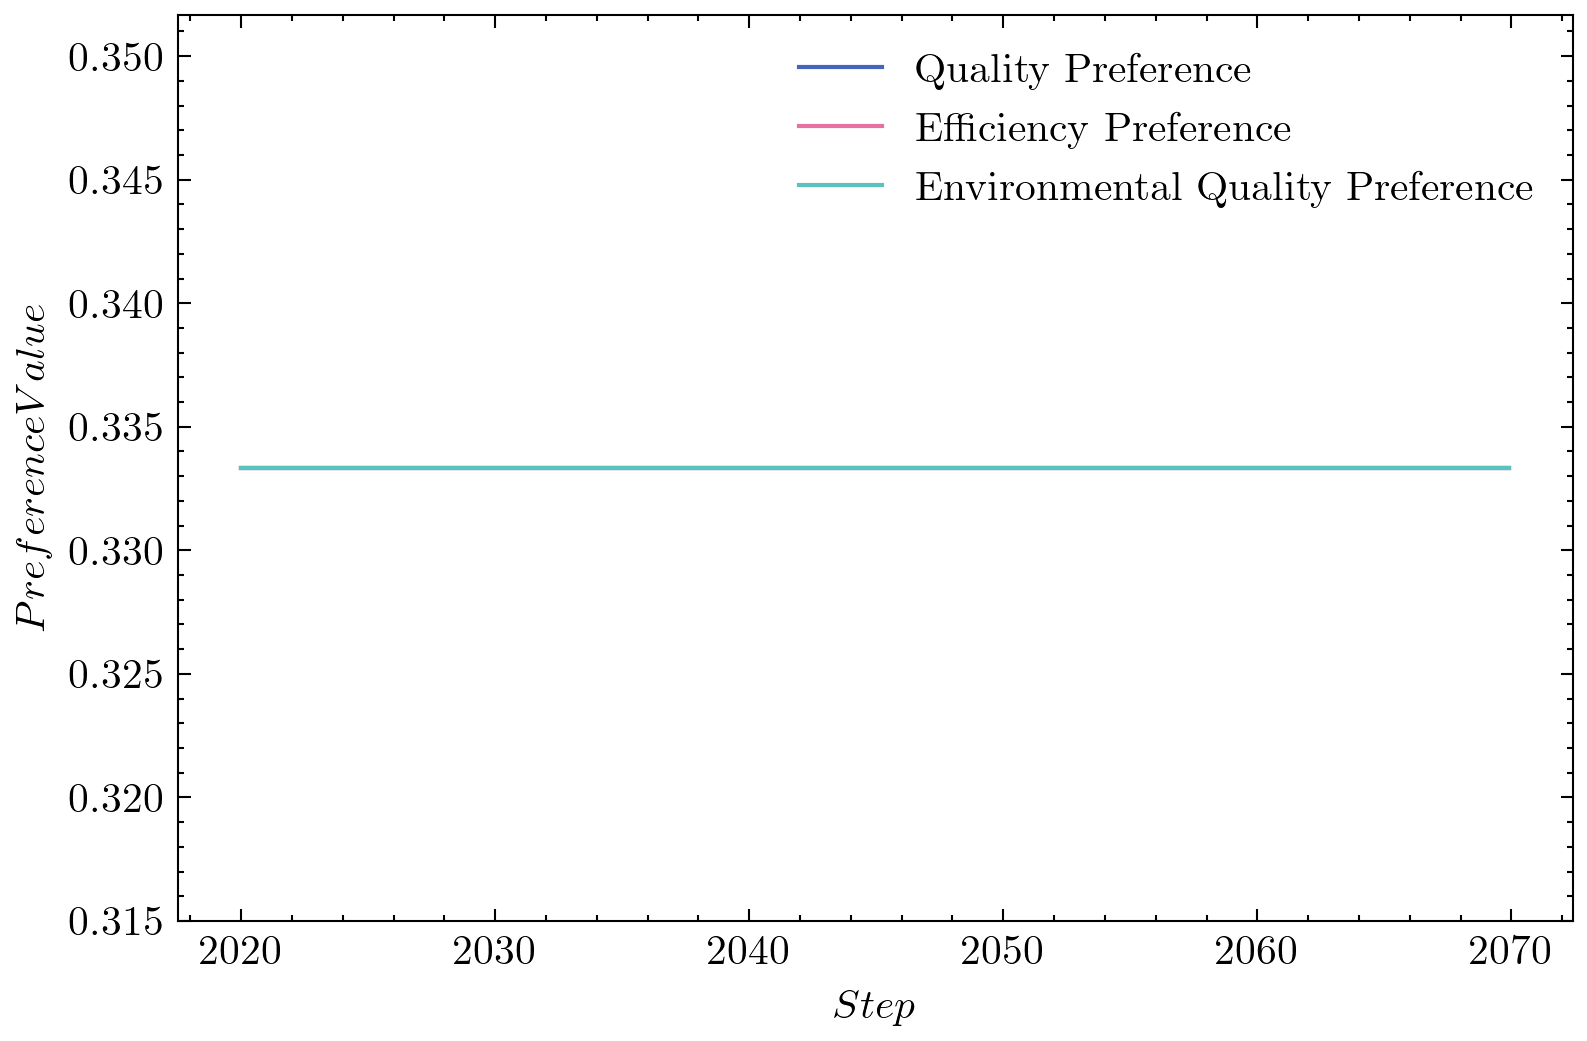

In [11]:
plt.figure(num=None, figsize=(6, 4), dpi=300)

plt.plot(x_lin,model_df.λ_b, label = "Quality Preference")
plt.plot(x_lin,model_df.λ_e, label = "Efficiency Preference")
plt.plot(x_lin,model_df.λ_g, label = "Environmental Quality Preference")
plt.xlabel('$Step$')
plt.ylabel("$Preference Value$")
plt.legend()
# plt.savefig('../Writing/Mid-term/Images/Recession/PreferencesRec.pdf')
plt.show()

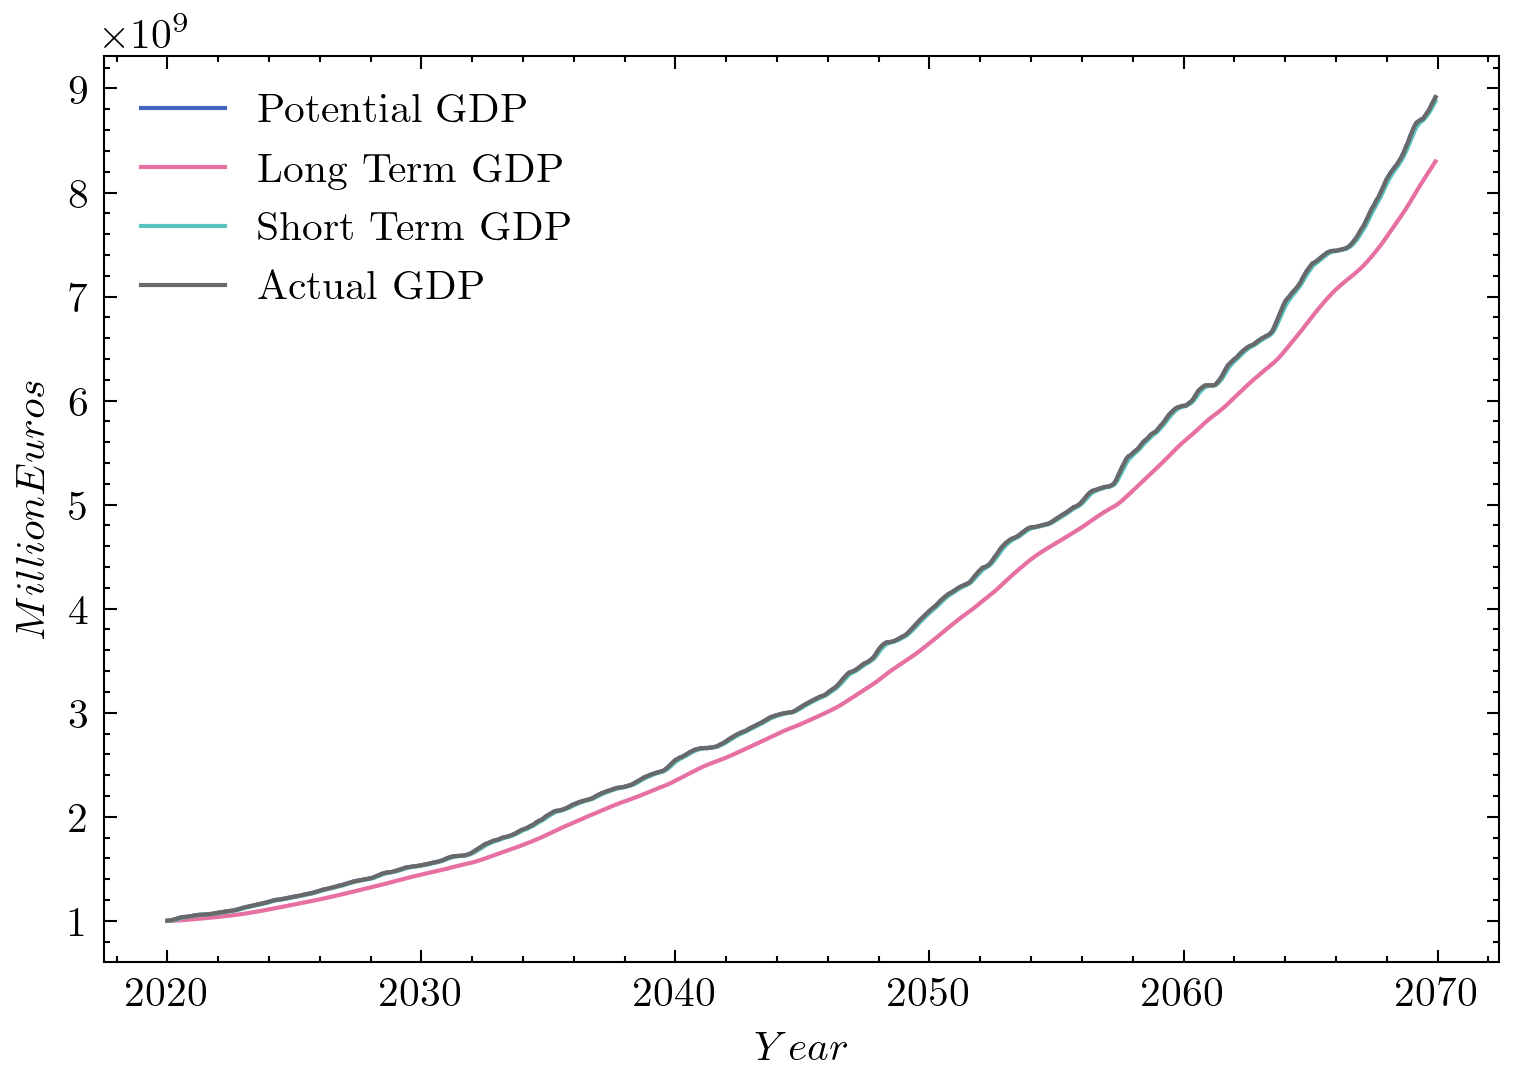

In [12]:
plt.figure(num=None, figsize=(6, 4), dpi=300)


pd.set_option('display.max_rows', None)
# model_df

plt.plot(x_lin,model_df.PotentialGDP, label = "Potential GDP")
plt.plot(x_lin,model_df.LongTermGDP, label = "Long Term GDP")
plt.plot(x_lin,model_df.shortTermGDP, label = "Short Term GDP")
plt.plot(x_lin,model_df.ActualGDP, label = "Actual GDP")
plt.xlabel("$Year$")
plt.ylabel("$Million Euros$")
# plt.yticks([10,250])
plt.legend()
# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/VerSinNoGDPs.pdf')
plt.show()

#### Some results

- Percentage of time that no project takes place.
- Percentage of time with negative wealth
- Mean wealth ratio


In [13]:
agent_df.proj.value_counts(normalize = True)

green         0.260939
efficiency    0.253874
False         0.243998
quality       0.241188
Name: proj, dtype: float64

In [14]:
agent_df[agent_df.s_fs<0].s_fs.count()/agent_df.shape[0]

0.0

In [15]:
# agent_df[agent_df.proj == 'green'][['proj','step']].groupby(['step']).plot()
# agent_df[agent_df.proj == 'quality'][['proj','step']].groupby(['step']).plot()
# agent_df[agent_df.proj == 'efficiency'][['proj','step']].groupby(['step']).plot()
# plt.show()

### Plot of market shares by different firms

In [16]:
# max_gfs = agent_df.groupby(['name']).g_fs.mean().max()
# min_gfs = agent_df.groupby(['name']).g_fs.mean().min()

# Set limits for coloring

max_gfs = 16
min_gfs = 10

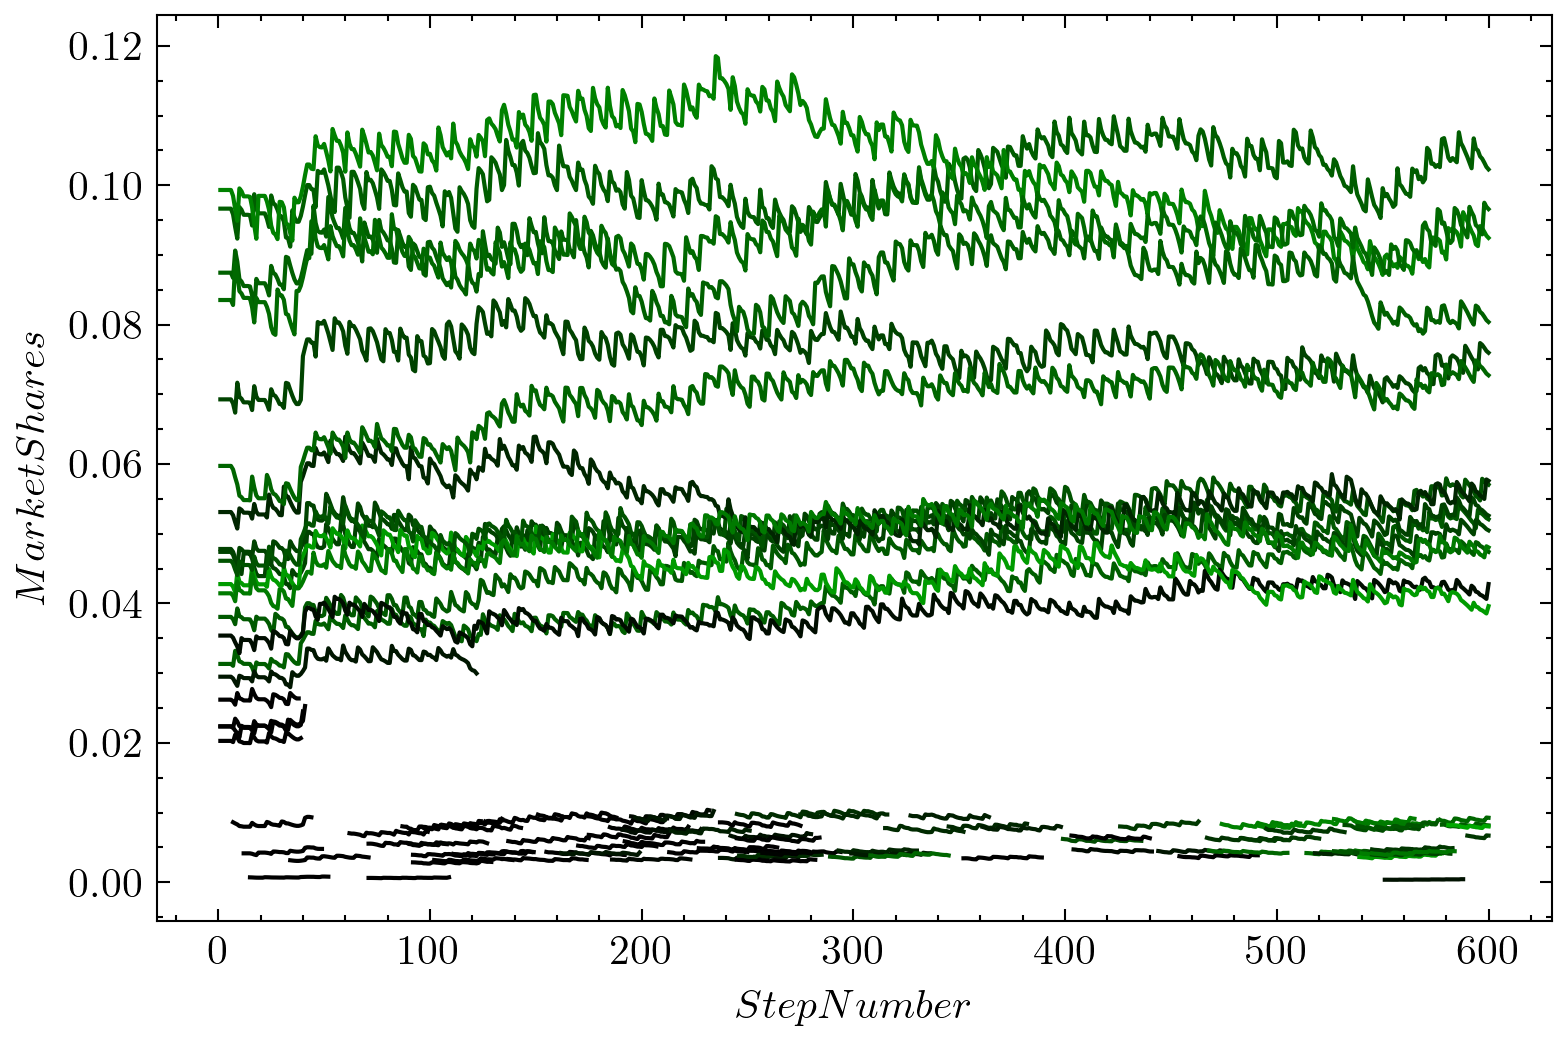

In [17]:
fig= plt.figure(figsize=(6,4), dpi = 300)

for i in agent_df.name.unique():
    color_gfs = (agent_df[agent_df.name == i].g_fs.mean() - min_gfs)/(max_gfs-min_gfs)
    color_gfs = 1 if color_gfs > 1 else color_gfs
    color_gfs = 0 if color_gfs < 0 else color_gfs
    plt.plot(agent_df[agent_df.name == i].step, agent_df[agent_df.name == i].ms_fs, label =   
    "Firm " + str(i),
    # c = [min(color_gfs*2,1),max(color_gfs*2-1,0),0])
    c = [0,min(max(color_gfs,0),1),0])
    # if i == 36:
    #      plt.plot(agent_df[agent_df.name == i].step, agent_df[agent_df.name == i].ms_fs, 'r')
    
plt.xlabel("$Step Number$")
plt.ylabel("$Market Shares$")
# # plt.legend()
# plt.savefig('../Writing/Mid-term/Images/Recession/MarketSharesRec.pdf')

# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/Ver6.pdf')
plt.show()


    

### Market Shares without Color Coding

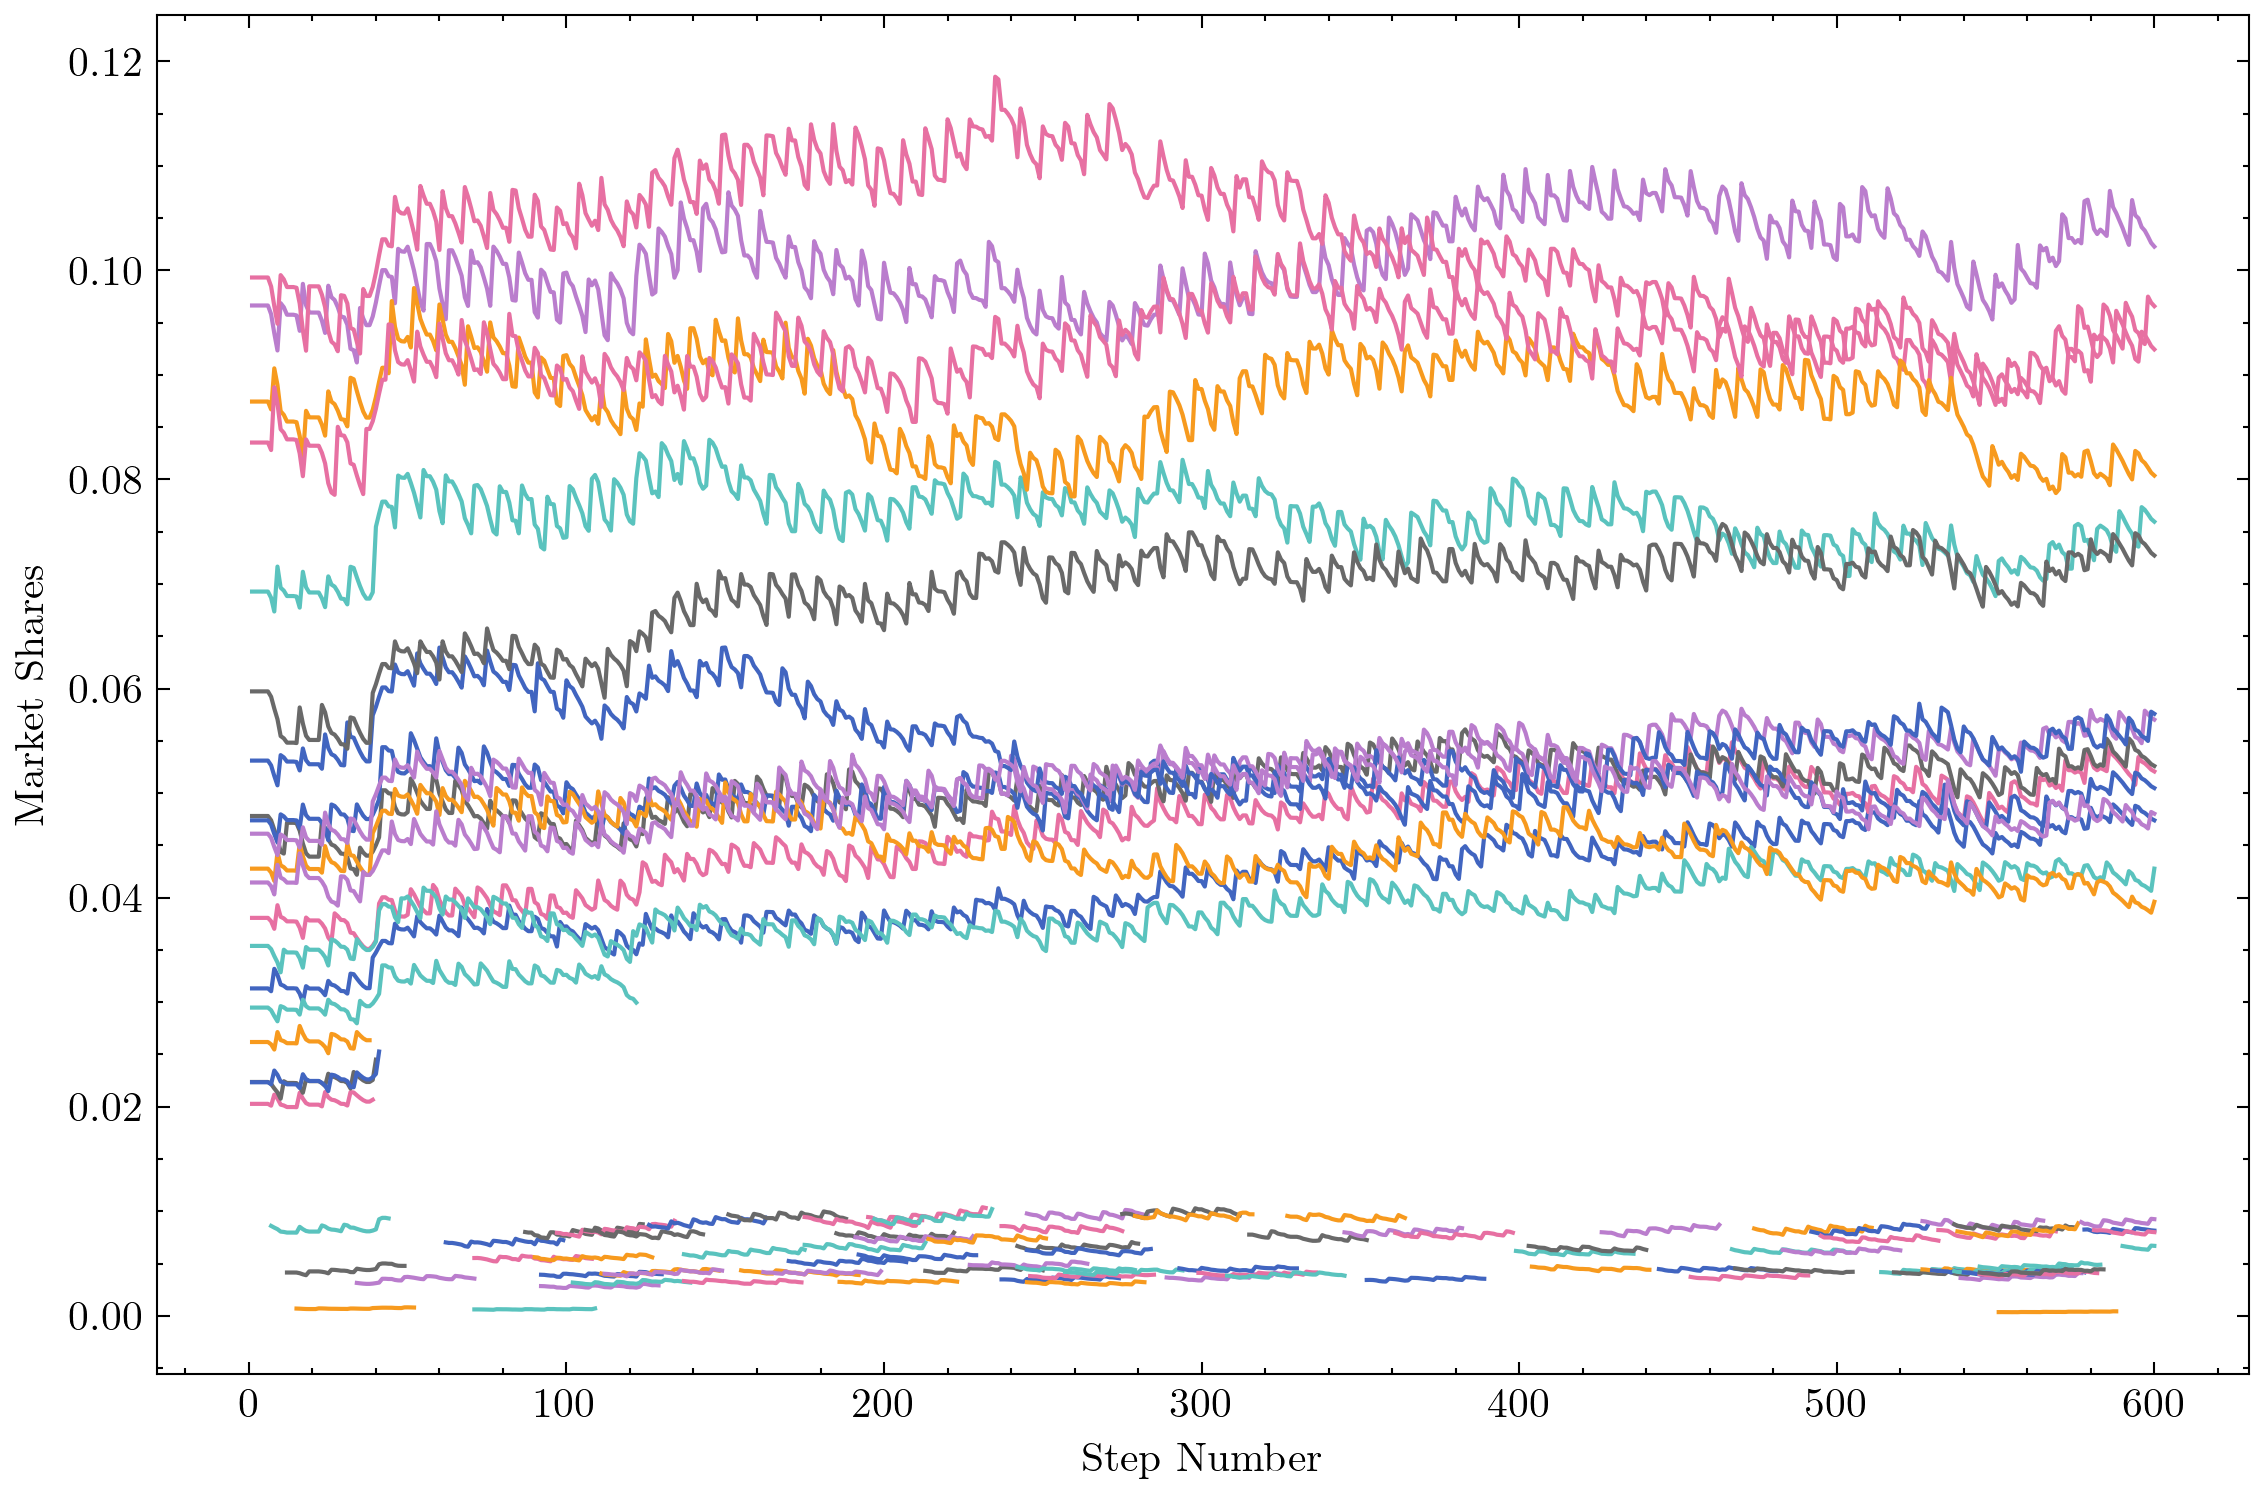

In [18]:
fig= plt.figure(figsize=(9,6), dpi = 300)
for i in agent_df.name.unique():
    plt.plot(agent_df[agent_df.name == i].step, agent_df[agent_df.name == i].ms_fs, label = "Firm " + str(i))

plt.xlabel("Step Number")
plt.ylabel("Market Shares ")
# plt.legend()

# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/VerMulVarNoMarUsQual.pdf')
plt.show()

In [19]:
agent_df.proj.value_counts()

green         3250
efficiency    3162
False         3039
quality       3004
Name: proj, dtype: int64

In [20]:
agent_df[agent_df.name == 4].proj.value_counts()

efficiency    16
False         10
green          6
quality        6
Name: proj, dtype: int64

In [21]:
agent_df[agent_df.name == 2].proj.value_counts()

quality       192
efficiency    162
False         138
green         108
Name: proj, dtype: int64

### Average Qualities During the Model Run

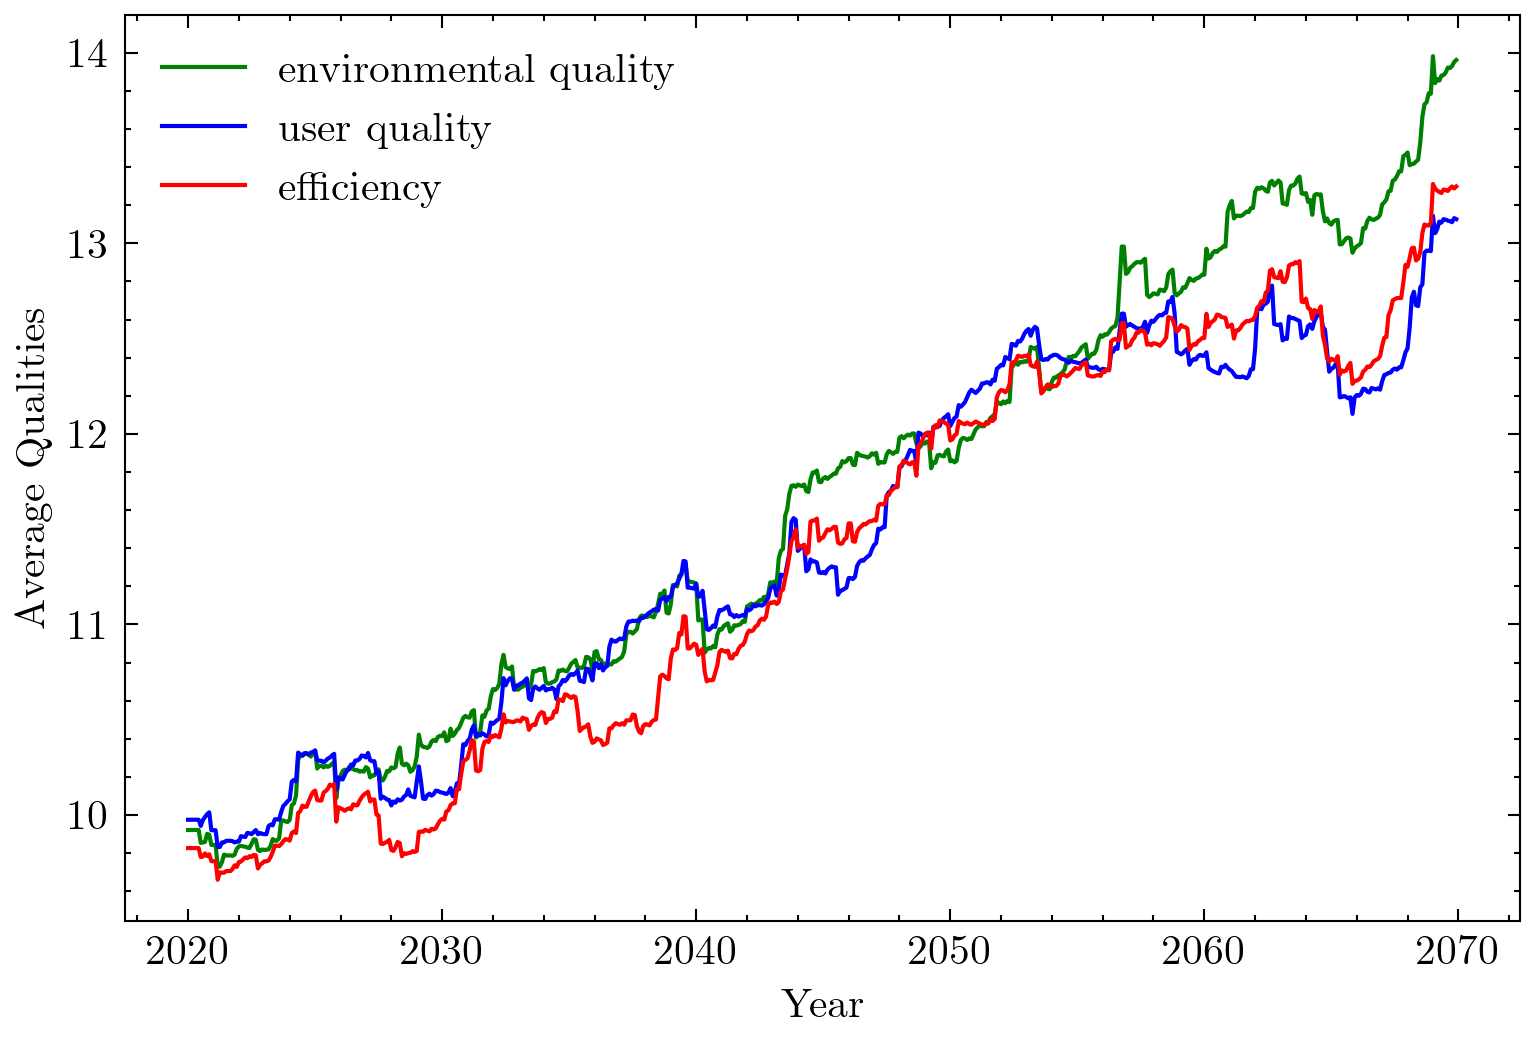

In [22]:
fig= plt.figure(figsize=(6,4), dpi = 300)
green = [] ; quality = [] ; efficiency = []
for i in agent_df.step.unique():
    # if i%10 ==0:
        green.append(agent_df[agent_df.step == i].g_fs.mean())
        quality.append(agent_df[agent_df.step == i].b_fs.mean())
        efficiency.append(agent_df[agent_df.step == i].e_fs.mean())

plt.plot(x_lin,green, 'g', label = "environmental quality" )
plt.plot(x_lin,quality, 'b', label = "user quality" )
plt.plot(x_lin,efficiency, 'r', label = "efficiency" )

plt.xlabel("Year")
plt.ylabel("Average Qualities ")


# plt.xlabel("Probability of investing in an aspect")
plt.legend()
# plt.savefig('../Writing/Mid-term/Images/Recession/AverageQualitiesRec.pdf')

# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/VerSinNoQual.pdf')

plt.show()

In [23]:
green_old = green.copy()
effieciency_old = efficiency.copy()
quality_old = quality.copy()


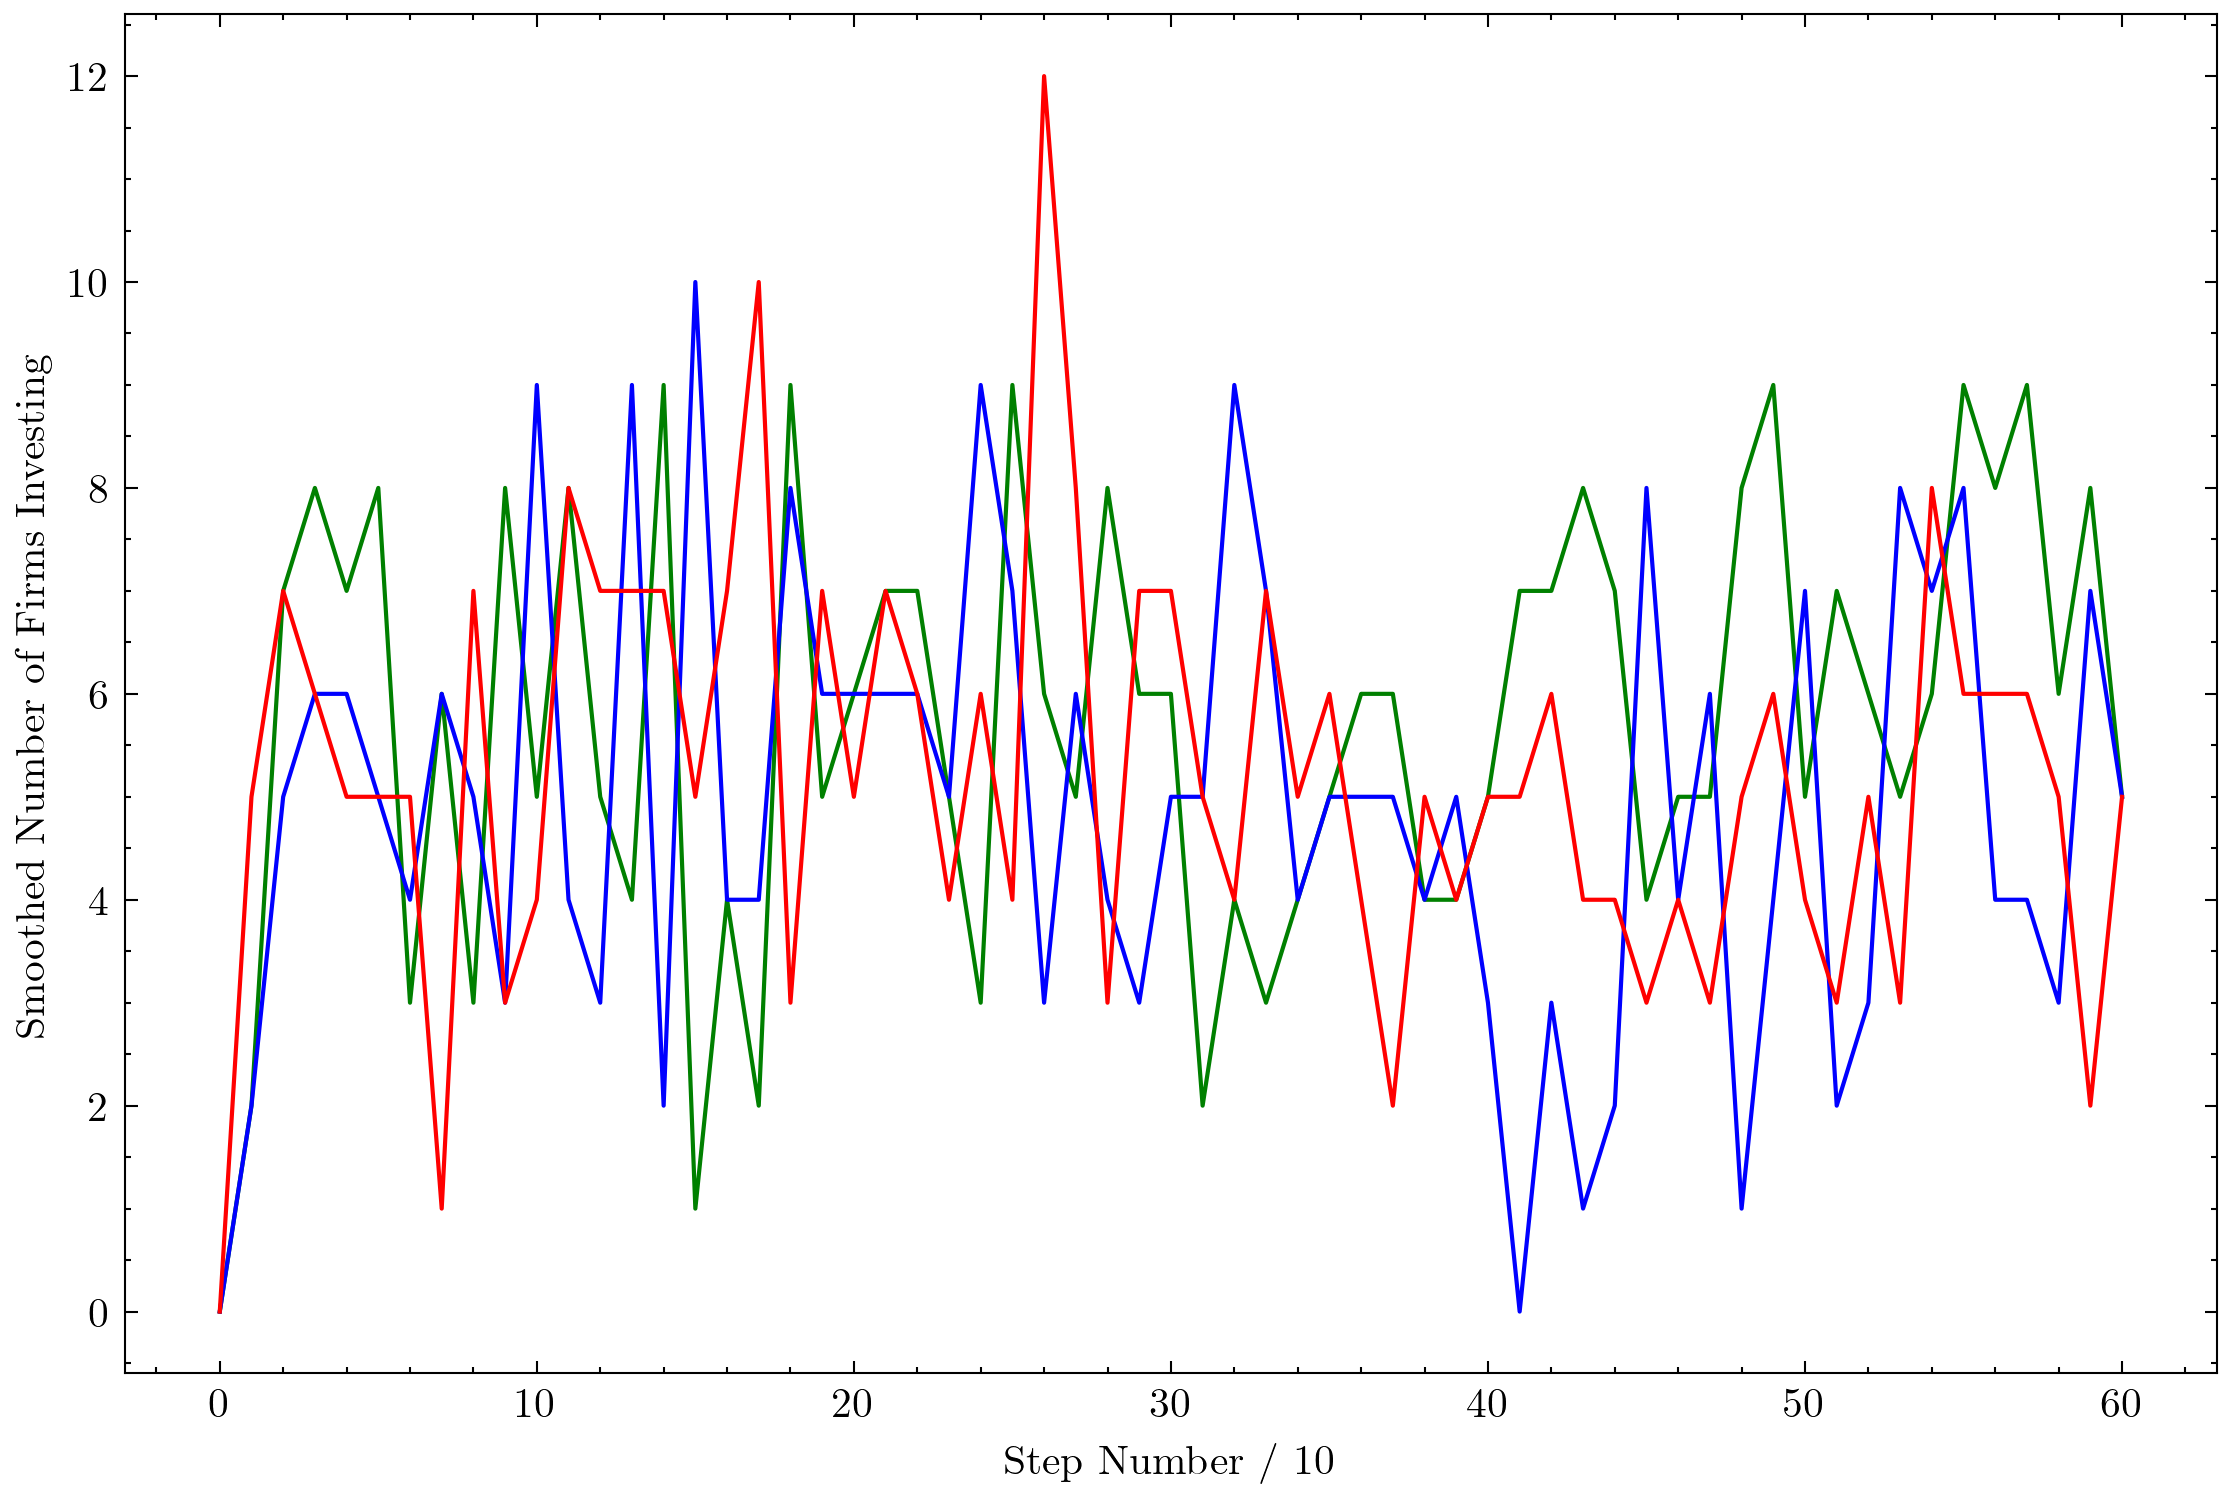

In [24]:
# very inefficienct chunk of code

fig= plt.figure(figsize=(9,6), dpi = 300)
green_in = [0]
quality_in = [0]
efficiency_in = [0]
for i in agent_df.step.unique():
    if i%10 ==0:
        temp_df = agent_df[agent_df.step == i]
        green_in.append(green_in[-1] * 0 + 1 * temp_df[temp_df.proj == 'green'].proj.count())
        quality_in.append(quality_in[-1] * 0 + 1 * temp_df[temp_df.proj == 'quality'].proj.count())
        efficiency_in.append(efficiency_in[-1]* 0 + 1 * temp_df[temp_df.proj == 'efficiency'].proj.count())

plt.plot(green_in, 'g', label = "environmental quality" )
plt.plot(quality_in, 'b', label = "user quality" )
plt.plot(efficiency_in, 'r', label = "efficiency" )

plt.xlabel("Step Number / 10")
plt.ylabel("Smoothed Number of Firms Investing")


# plt.savefig('../Writing/My_Thesis/Chapters/ModelVerification/Images/Ver4.pdf')
# plt.savefig('../Writing/Mid-term/Images/Recession/InvestingRec.pdf')

plt.show()

#### Scatter plot of market share improvement and investment strategies

In [25]:
# 

In [26]:
df_green_ms = pd.DataFrame(columns=['green','efficiency','quality','ms_improvement'], index = agent_df.name.unique())
for i in agent_df.name.unique():
    df_green_ms.loc[i,"green"] = agent_df[agent_df.name == i].green.iloc[0]
    df_green_ms.loc[i,"efficiency"] = agent_df[agent_df.name == i].efficiency.iloc[0]
    df_green_ms.loc[i,"quality"] = agent_df[agent_df.name == i].quality.iloc[0]

    df_green_ms.loc[i,"ms_improvement"] = agent_df[agent_df.name == i].ms_fs.iloc[-1] - agent_df[agent_df.name == i].ms_fs.iloc[0]


In [27]:
df_green_ms.head()

green efficiency   quality ms_improvement
0  0.333333   0.333333  0.333333      0.0160815
1  0.333333   0.333333  0.333333      0.0140053
2  0.333333   0.333333  0.333333     0.00739132
3  0.333333   0.333333  0.333333     0.00478237
4  0.333333   0.333333  0.333333    0.000171356

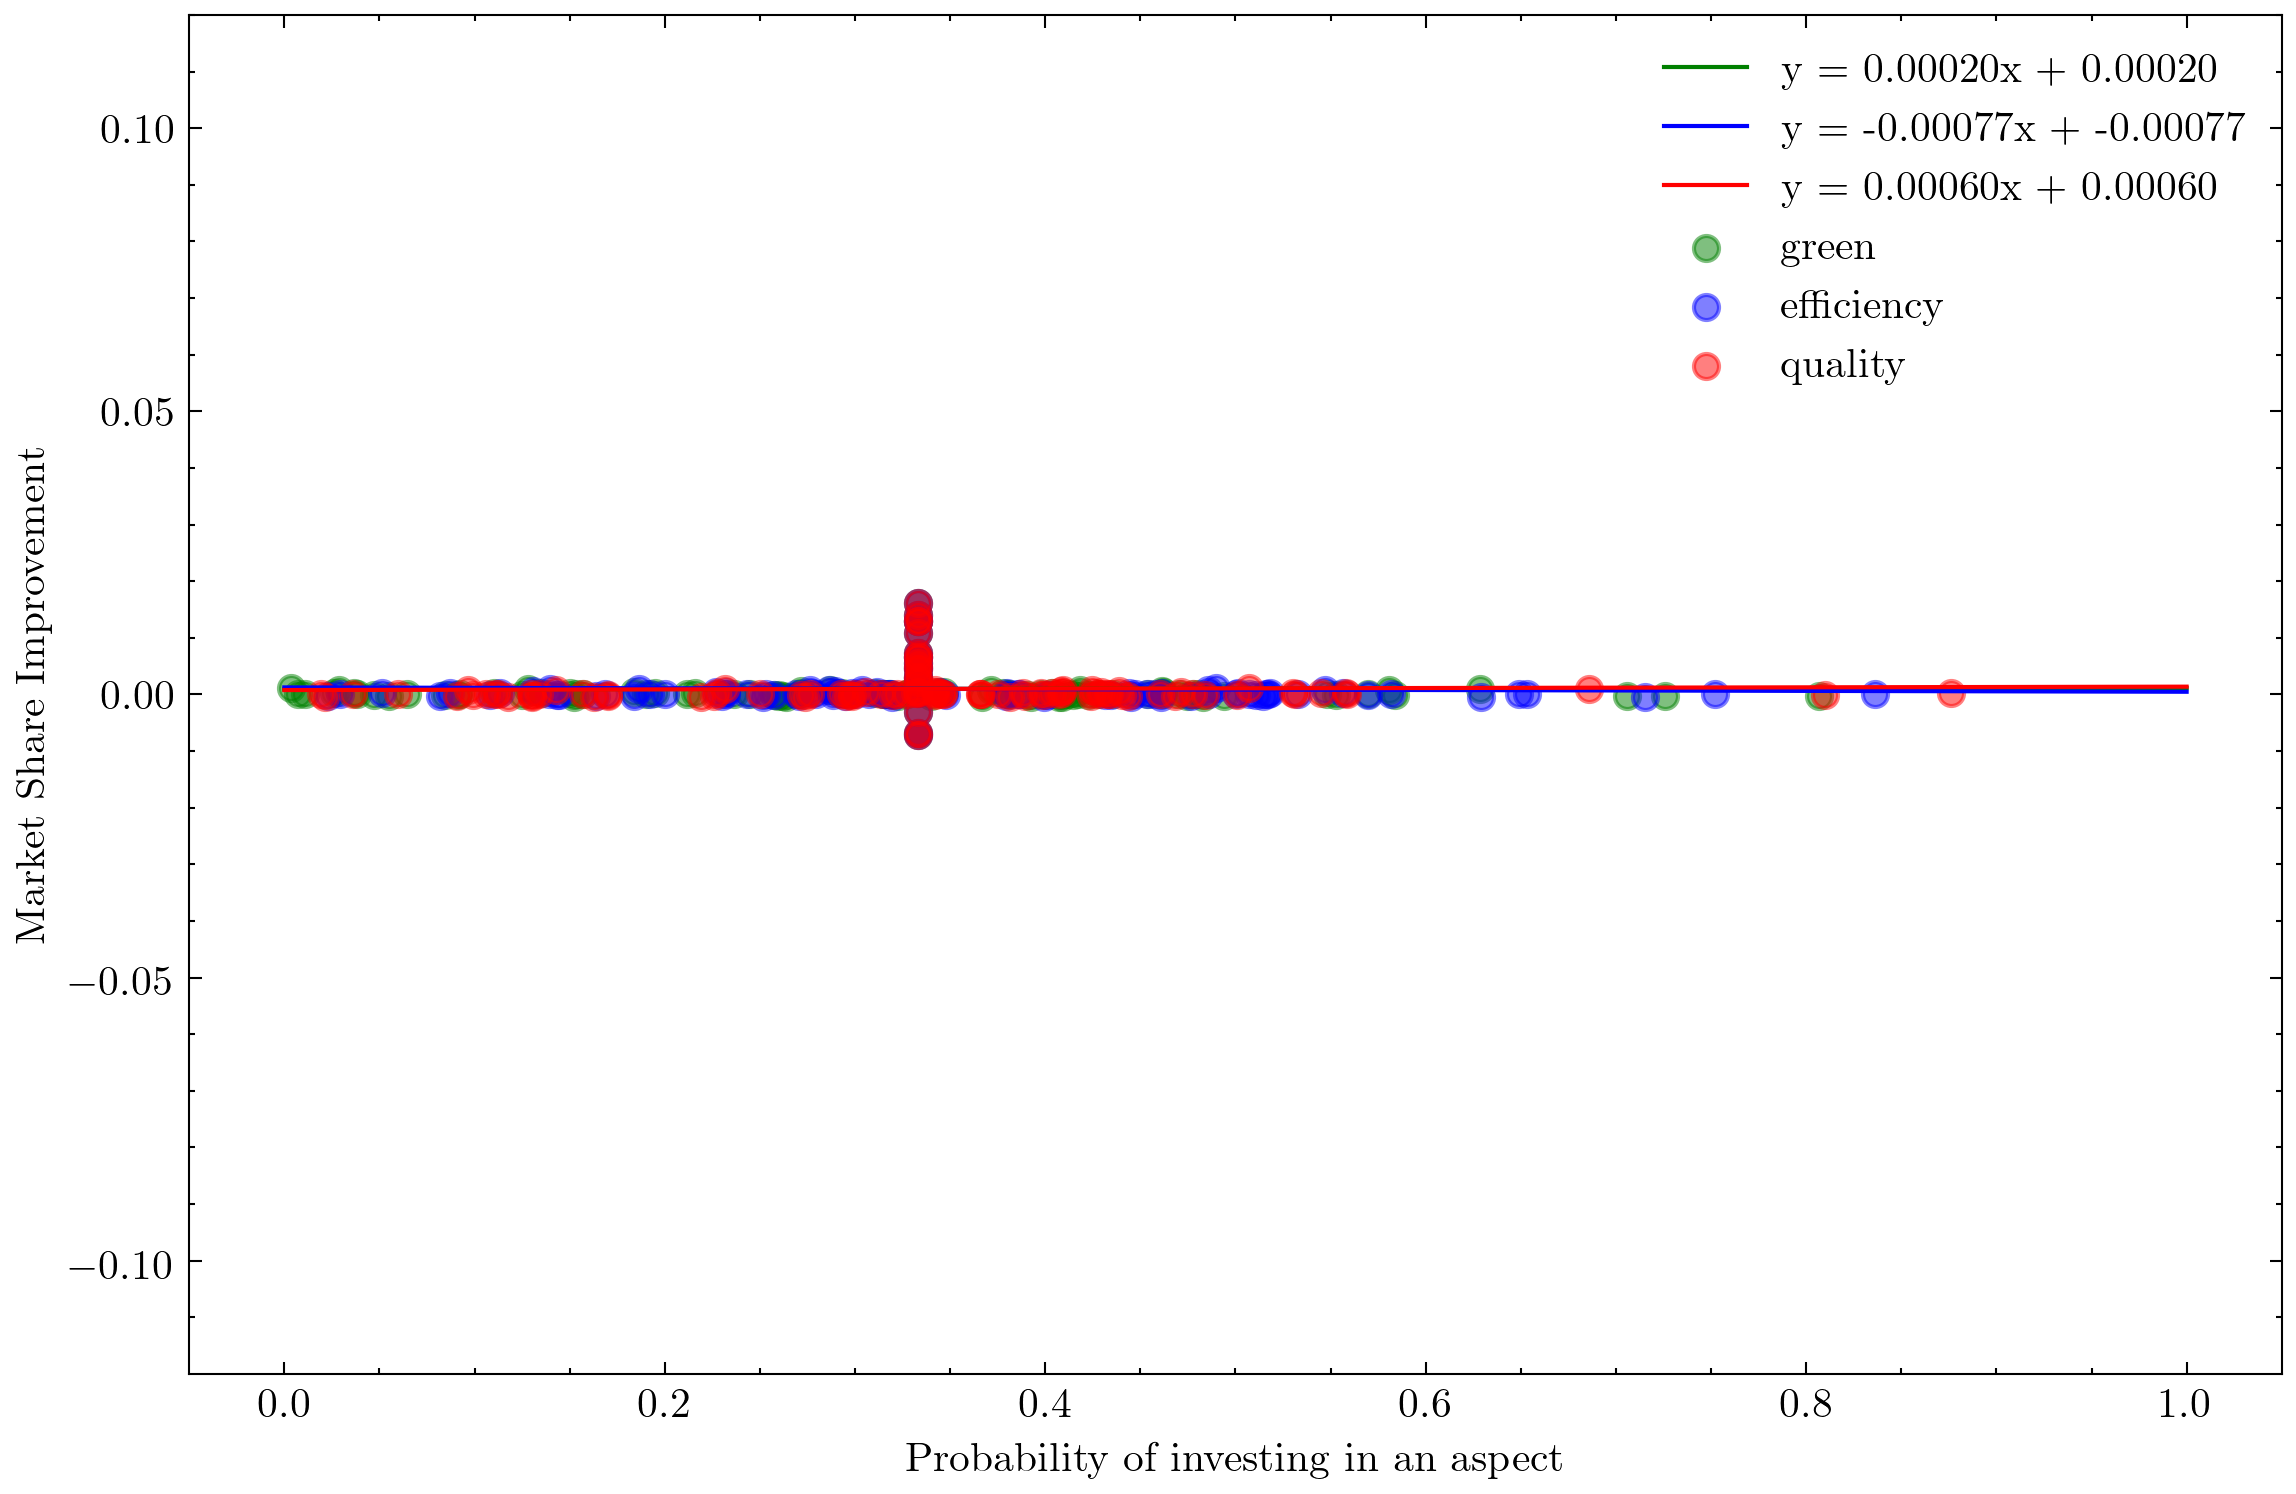

In [28]:
fig= plt.figure(figsize=(9,6),dpi = 300)
x = np.linspace(0,1,df_green_ms.ms_improvement.size)

ag, bg = np.polyfit(df_green_ms.green.astype(float),df_green_ms.ms_improvement.astype(float), deg=1)
y_green = ag * x + bg
ae, be = np.polyfit(df_green_ms.efficiency.astype(float),df_green_ms.ms_improvement.astype(float), deg=1)
y_efficiency = ae * x + be

aq, bq = np.polyfit(df_green_ms.quality.astype(float),df_green_ms.ms_improvement.astype(float), deg=1)
y_quality = aq * x + bq

plt.scatter(df_green_ms.green,df_green_ms.ms_improvement, label = "green", color =  'g',alpha = 0.5)
plt.plot(x,y_green, label = "y = {0:.5f}x + {0:.5f} ".format(ag,bg), color = 'g', linewidth = 1)

plt.scatter(df_green_ms.efficiency,df_green_ms.ms_improvement, label = "efficiency", color = 'b',alpha = 0.5)
plt.plot(x,y_efficiency, label = "y = {0:.5f}x + {0:.5f} ".format(ae,be) , color = 'b', linewidth = 1)

plt.scatter(df_green_ms.quality,df_green_ms.ms_improvement, label = 'quality', color =  'r', alpha = 0.5)
plt.plot(x,y_quality, label = "y = {0:.5f}x + {0:.5f} ".format(aq,bq), color = 'r', linewidth = 1)
plt.legend()

plt.ylim(-0.12,0.12)

plt.ylabel("Market Share Improvement")
plt.xlabel("Probability of investing in an aspect")

# plt.savefig('../Writing/Mid-term/Images/Recession/SimulationRec.pdf')

plt.show()

## Model Validation
Based on the three validation tests done by D'Orazio and Valente. 



### Procyclical investments

Positive relationship between investment levels and GDP growth. 
Doesn't make so much sense to check that in my opinion as it can be derived directly out of equation 19. 
Additionally they don't define what exactly investment growth rate is. 
So I just confirm here that there is a positive relationship.

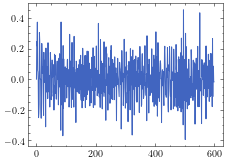

In [29]:
model_df.InvestmentGrowth.plot()
plt.show()

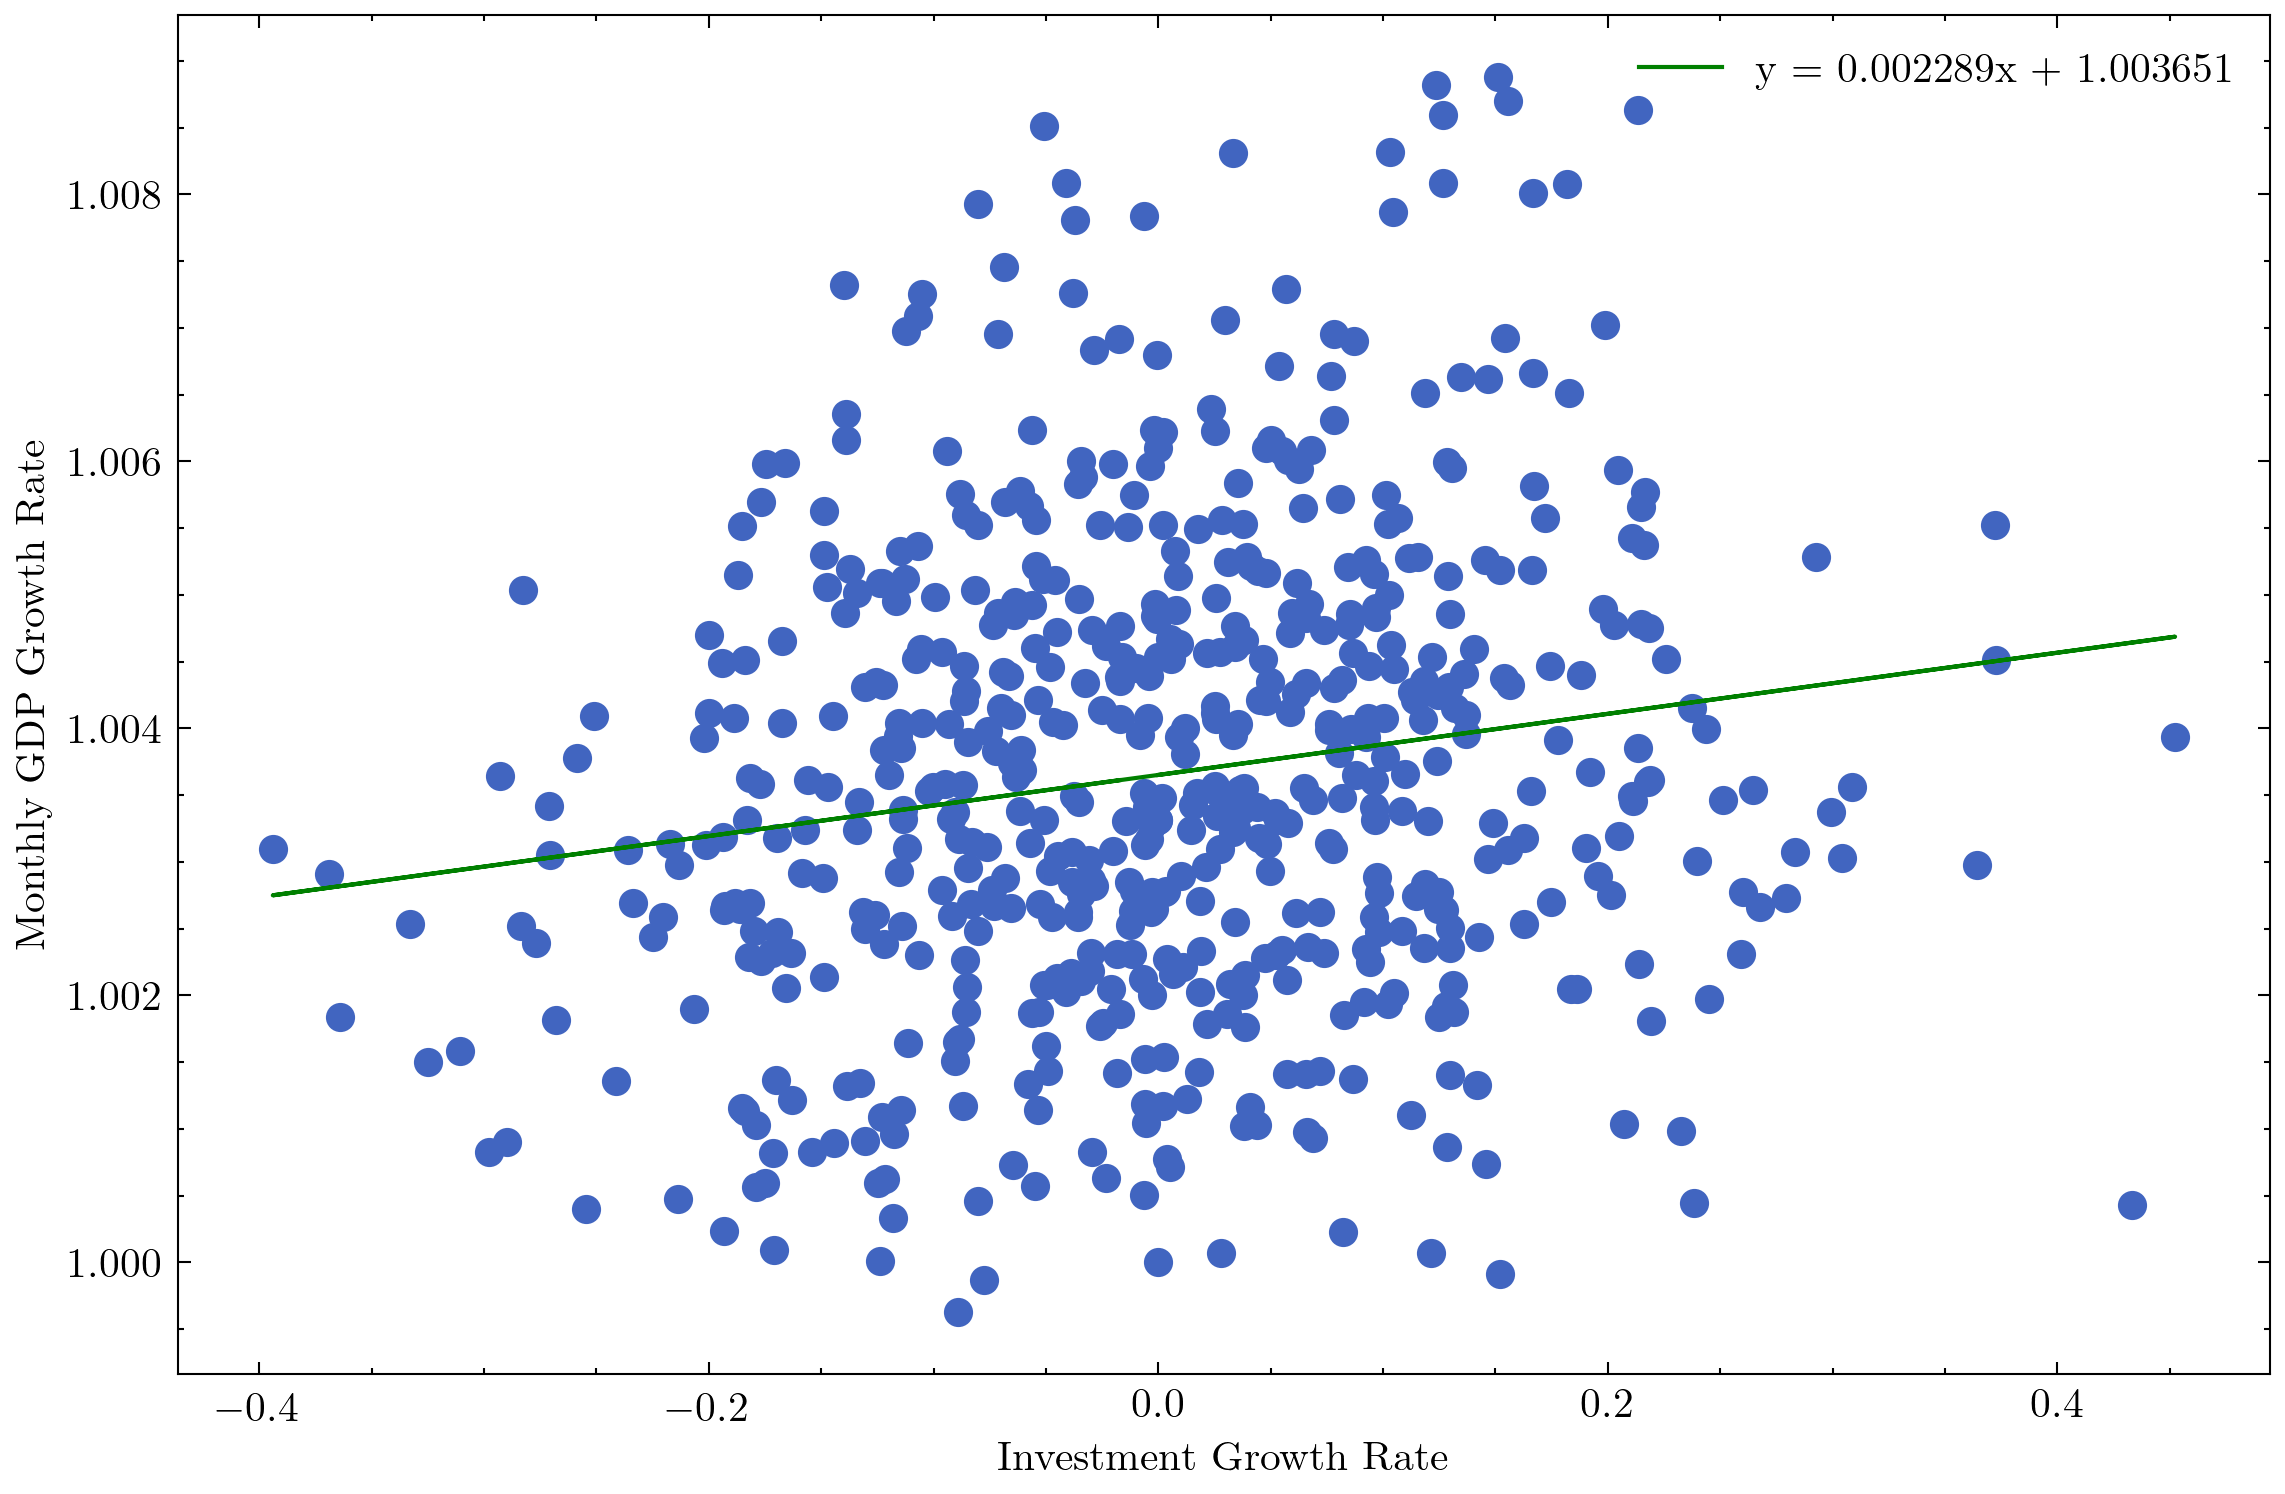

In [49]:

plt.style.use(['science','retro'])
plt.figure(num=None, figsize=(9,6 ), dpi=300)
model_df.head()
plt.scatter(model_df.InvestmentGrowth,model_df.GDPGrowth, label = 'quality')
# plt.xlim(-0.4,0.4)
a, b = np.polyfit(model_df.InvestmentGrowth,model_df.GDPGrowth, deg=1)
y = a * model_df.InvestmentGrowth + b
plt.plot(model_df.InvestmentGrowth,y,'g')
plt.xlabel('Investment Growth Rate')
plt.ylabel('Monthly GDP Growth Rate')
plt.legend(["y = " + str(round(a,6)) + "x + " + str(round(b,6))])

plt.savefig('../Writing/My_Thesis/Chapters/ModelValidation/Images/Validation1.pdf')
plt.show()


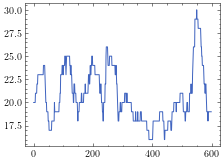

In [31]:
model_df.agents.plot()
# plt.savefig('../Writing/Mid-term/Images/Recession/FirmsRec.pdf')
plt.show()

### Firm's size distribution.

In [32]:
firms_gb = agent_df.groupby(['name'])

In [33]:
agent_df.head()

Step  AgentID  name      e_fs        p_fs       b_fs       g_fs      I_fs  \
0     1        0     0  9.871990  297.494064   9.051852  10.099325  9.663731   
1     1        1     1  9.870645  297.507602   9.840736   9.660670  9.790242   
2     1        2     2  9.409297  302.209425  10.238542   9.599309  9.742680   
3     1        3     3  9.533655  300.930249  10.242268  10.058284  9.940155   
4     1        4     4  9.269160  303.661980  10.027156   9.368880  9.549236   

      ms_fs          r_fs        c_fs        f_c_fs          π_fs  \
0  0.031317  3.131721e+07  247.911720  4.071237e+06  1.148298e+06   
1  0.038064  3.806379e+07  247.923002  4.948293e+06  1.395672e+06   
2  0.035382  3.538237e+07  251.841188  4.599708e+06  1.297354e+06   
3  0.047809  4.780878e+07  250.775207  6.215141e+06  1.752988e+06   
4  0.026190  2.619024e+07  253.051650  3.404732e+06  9.603090e+05   

           s_fs  step   proj     green  efficiency   quality  p_r_imits  age  \
0  3.827659e+06     1  False  0.333333    0.333333  0.333333   0.034085    0   
1  4.652241e+06     1  False  0.333333    0.333333  0.333333   0.040233    0   
2  4.324512e+06     1  False  0.333333    0.333333  0.333333   0.037811    0   
3  5.843295e+06     1  False  0.333333    0.333333  0.333333   0.048834    0   
4  3.201030e+06     1  False  0.333333    0.333333  0.333333   0.029279    0   

   sum_of_innov  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0

In [34]:
firms_gb2 = agent_df[agent_df.Step == d_steps]

In [35]:
market_shares = firms_gb[['ms_fs']].mean()

In [36]:
market_shares2 = firms_gb2[['ms_fs']]

In [37]:
market_shares2

ms_fs
12436  0.047399
12437  0.052069
12438  0.042774
12439  0.052591
12440  0.102274
12441  0.050479
12442  0.039602
12443  0.057029
12444  0.057584
12445  0.092441
12446  0.075963
12447  0.072728
12448  0.080372
12449  0.048029
12450  0.096574
12451  0.009247
12452  0.008150
12453  0.008003
12454  0.006693

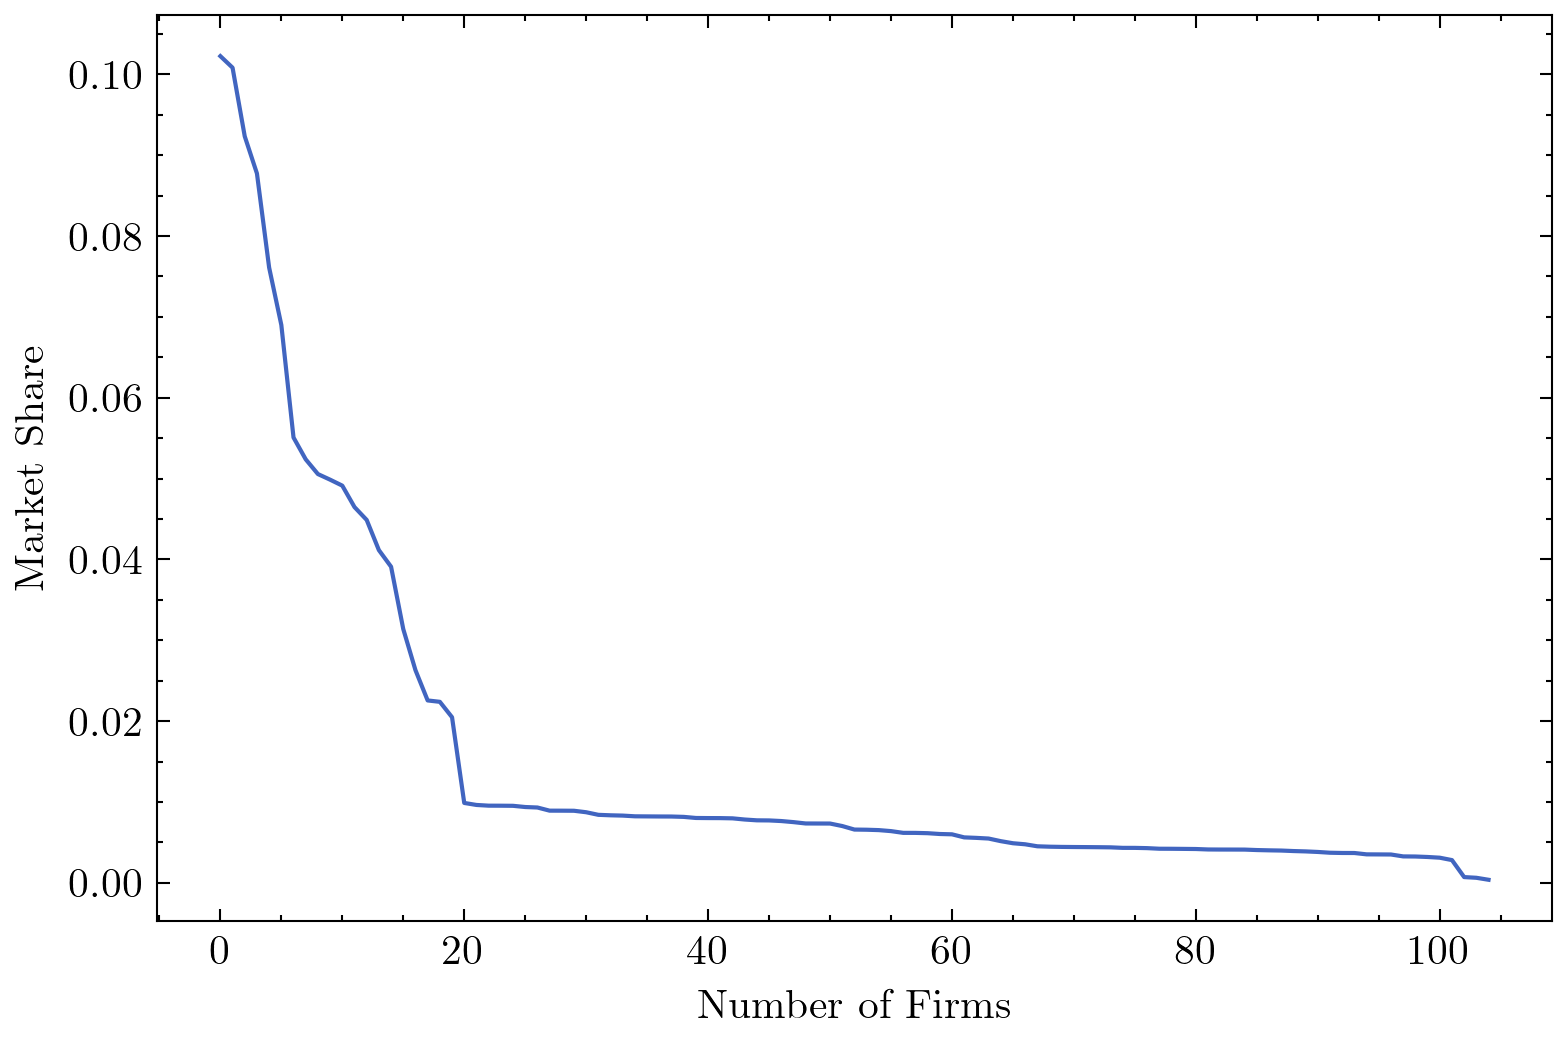

In [38]:
plt.figure(num=None, figsize=(6, 4), dpi=300)

market_shares.sort_values(by = 'ms_fs', ascending = False).reset_index().ms_fs.plot()
plt.ylabel('Market Share')
plt.xlabel('Number of Firms')


plt.savefig('../Writing/My_Thesis/Chapters/ModelValidation/Images/Validation2.pdf')
plt.show()

### Frequencies of one-period GDP growth rates

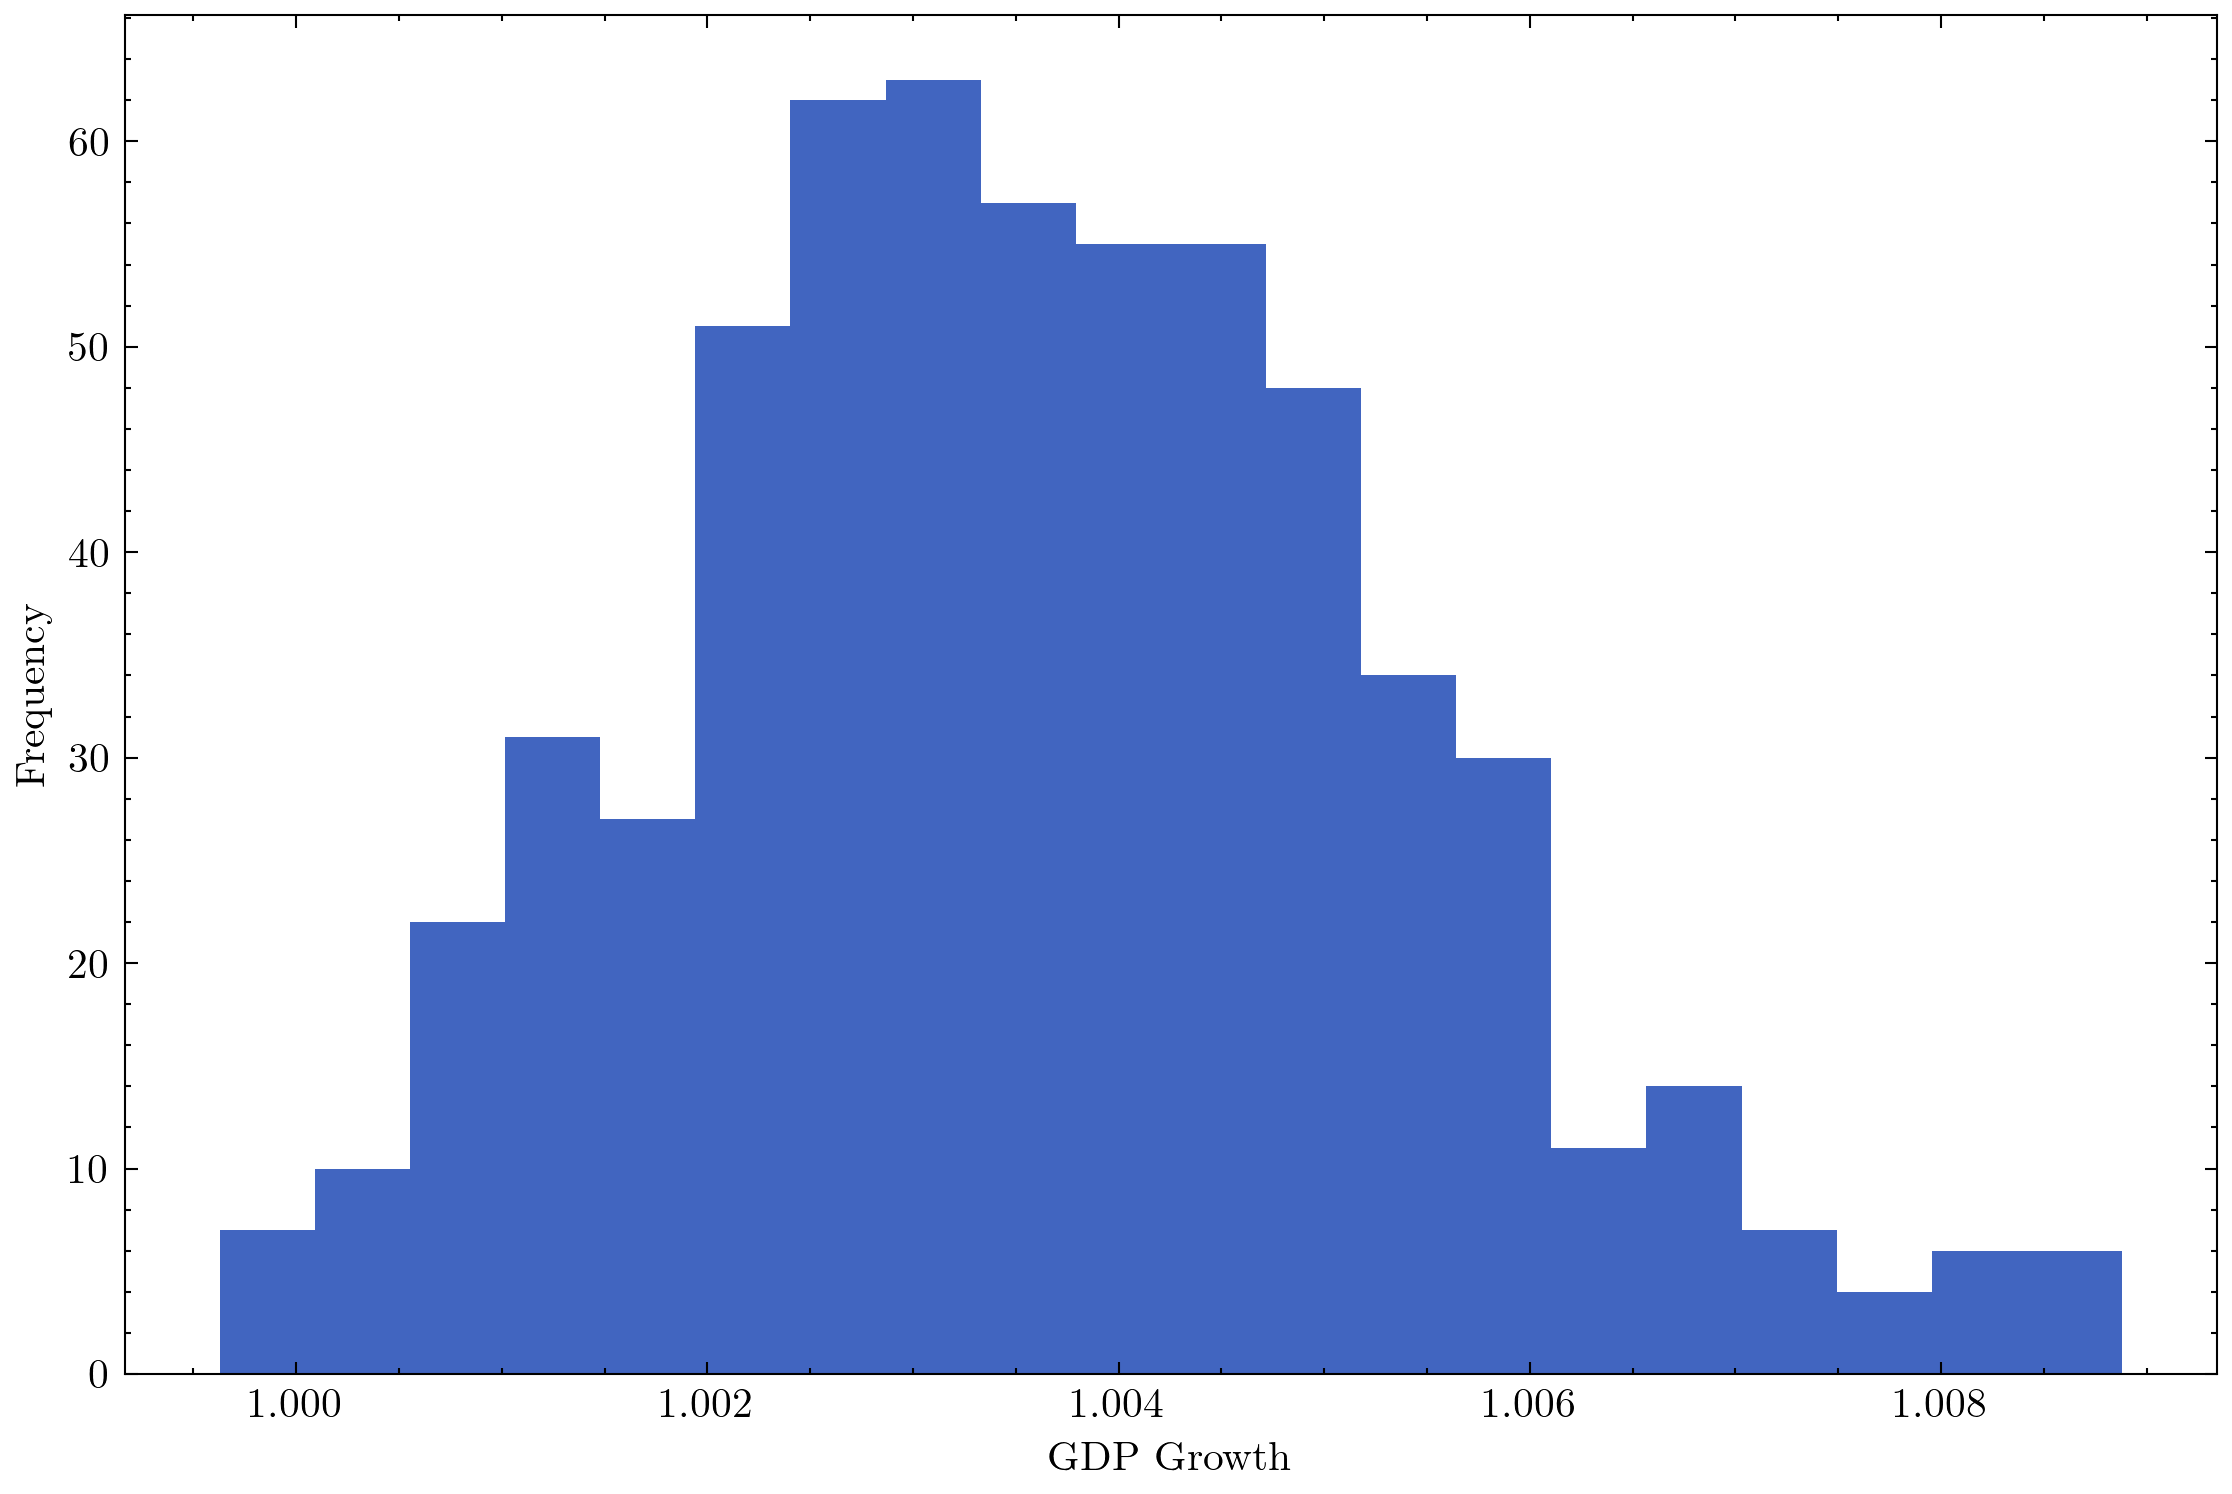

In [48]:
plt.figure(num=None, figsize=(9, 6), dpi=300)

plt.xlabel('GDP Growth')
plt.ylabel('Frequency')
# plt.xlim(0.9985,1.015)

model_df.GDPGrowth.plot.hist(bins=20)
plt.savefig('../Writing/My_Thesis/Chapters/ModelValidation/Images/Validation3.pdf')

plt.show()

### Simulation modules

In [40]:
temp_firms = agent_df.groupby(['name']).apply( lambda x: x.iloc[-1,:])
temp_firms.head()

Step  AgentID  name       e_fs        p_fs       b_fs       g_fs  \
name                                                                     
0      600        0     0  14.071990  258.259528  12.351852  14.299325   
1      600        1     1  12.920645  268.602936  14.090736  13.910670   
2      600        2     2  13.659297  261.949246  15.988542  11.149309   
3      600        3     3  13.333655  264.873346  13.442268  14.158284   
4       38        4     4   9.669160  299.546502  10.127156   9.468880   

           I_fs     ms_fs          r_fs        c_fs        f_c_fs  \
name                                                                
0     13.545687  0.047399  4.225919e+08  215.216274  5.124438e+07   
1     13.630819  0.052069  4.642318e+08  223.835780  5.607458e+07   
2     13.453287  0.042774  3.813567e+08  218.291038  4.539046e+07   
3     13.639887  0.052591  4.688860e+08  220.727788  5.727894e+07   
4      9.751205  0.026362  2.983689e+07  249.622085  3.661448e+06   

              π_fs          s_fs  step        proj     green  efficiency  \
name                                                                       
0     1.918761e+07  6.518980e+07   600  efficiency  0.333333    0.333333   
1     2.129739e+07  7.190538e+07   600       green  0.333333    0.333333   
2     1.816899e+07  5.404833e+07   600       False  0.333333    0.333333   
3     2.086873e+07  7.134710e+07   600       green  0.333333    0.333333   
4     1.311367e+06  4.303806e+06    38  efficiency  0.333333    0.333333   

       quality  p_r_imits  age  sum_of_innov  
name                                          
0     0.333333   0.049342  599           1.0  
1     0.333333   0.053445  599           1.0  
2     0.333333   0.045219  599           1.0  
3     0.333333   0.053900  599           1.0  
4     0.333333   0.029163   37           1.0

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(3, 2, 1, projection='3d')
x_vals = temp_firms['green']
y_vals = temp_firms['quality']
z_vals = temp_firms['b_fs']

ax.scatter3D(x_vals, y_vals, z_vals, c = z_vals, cmap = 'hsv')
ax.set_xlabel('green')
ax.set_ylabel('quality')
ax.set_zlabel('b_fs')


ax = fig.add_subplot(3, 2, 3, projection='3d')

x_vals = temp_firms['g_fs']
y_vals = temp_firms['b_fs']
z_vals = temp_firms['ms_fs']

ax.scatter3D(x_vals, y_vals, z_vals, c = z_vals, cmap = 'hsv')
ax.set_xlabel('g_fs')
ax.set_ylabel('b_fs')
ax.set_zlabel('ms_fs')

ax.view_init(elev = 10 , azim = 90)

ax = fig.add_subplot(3, 2, 5, projection='3d')

x_vals = temp_firms['green']
y_vals = temp_firms['efficiency']
z_vals = temp_firms['ms_fs']

ax.scatter3D(x_vals, y_vals, z_vals, c = z_vals, cmap = 'hsv')
ax.set_xlabel('green')
ax.set_ylabel('efficiency')
ax.set_zlabel('ms_fs')

plt.show()


RuntimeError: latex was not able to process the following string:
b'b_fs'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (MiKTeX 2.9.7300 64-bit)
entering extended mode
(C:/Users/georg/.matplotlib/tex.cache/afaaefe6c066c7ed2ba0fb976f1d603a.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-03-06>
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/base\article.cls"
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/base\size10.clo"))

("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/type1cm\type1cm.st
y")
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/cm-super\type1ec.s
ty" ("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/base\t1cmr.fd"
))
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/base\textcomp.sty"
) ("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/base\inputenc.st
y")
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/amsmath\amsmath.st
y"
For additional information on amsmath, use the `?' option.

("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/amsmath\amstext.st
y"
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/amsmath\amsgen.sty
"))
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/amsmath\amsbsy.sty
")
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/amsmath\amsopn.sty
"))
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/geometry\geometry.
sty"
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/graphics\keyval.st
y")
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/generic/iftex\ifvtex.sty
" ("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/generic/iftex\iftex.st
y"))
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/geometry\geometry.
cfg")

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
("C:\Users\georg\AppData\Local\Programs\MiKTeX 2.9\tex/latex/l3backend\l3backen
d-dvips.def") (afaaefe6c066c7ed2ba0fb976f1d603a.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{10.000000}{12.500000}{\rmfamily b_
                                                 fs}
No pages of output.
Transcript written on afaaefe6c066c7ed2ba0fb976f1d603a.log.




### Batch Running 

In [ ]:
# # for time being something doesn't seem to work in the batch_run thing 

# parameters = {"F": range(1,10),"steps": range(10,10)}
# batch_run = BatchRunner(EconomyModel, parameters, max_steps=10,
#                         model_reporters={"n_agents": lambda m: m.schedule.get_agent_count()})
# batch_run.run_all()

In [43]:
#batch_df = batch_run.get_model_vars_dataframe()

### Visualization Modules